In [556]:
from utils_visualization import *

import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import logging as logger
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
from scipy.stats import gaussian_kde

import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

logger.basicConfig(level=logger.INFO, format='%(asctime)s - %(message)s', datefmt='%d-%b-%y %H:%M:%S', filename='visualization.log')

In [557]:
cmap_dict = sns.color_palette(palette=["#C8FFC8", "#00C800", "#007800", "#FFFF00", "#FFC878", "#FF9600", "#FF0000", "#780000", "#FF00FF", "#8C3CFF", "#000078"],n_colors=11)

hex_colors = [mcolors.to_hex(color) for color in cmap_dict]
custom_color_scale = [[i/len(hex_colors), color] for i, color in enumerate(hex_colors)]
custom_color_scale.append([1, hex_colors[-1]])

def leq(levels):
    levels = levels[~np.isnan(levels)]
    l = np.array(levels)
    return 10*np.log10(np.mean(np.power(10,l/10)))


COLOR_PALLET_PORT_L1 = {
            'Siren': '#2986cc', # BLUE
            'Sound Event': '#cc0000', # RED
            'Transport': '#6aa84f', #  green 6aa84f
            'Human': '#ffa500', # orange
            'Nature': '#8e7cc3', # PURPLE
            'Animal': '#9b5f00', # BROWN
            'Music': '#d172a4', # PINK
            'Engine': '#000000', # BLACK
        }

In [558]:
yamnet = pd.read_csv(r"C:\Users\scjaa\AAC - CENTRO DE ACUSTICA APLICADA, S.L\I + D + i - Documentos\Modelos_IA\AAC_IA_Puerto\yamnet_class_AAC_v3_0.csv",sep=';')

yamnet = yamnet.drop(columns=['index', 'Brown_Level_1'])
yamnet = yamnet.loc[:, ~yamnet.columns.str.contains('^Unnamed')]

yamnet

mid                display_name iso_taxonomy    Brown_Level_2  \
0      /m/09x0r                      Speech        Voice            Voice   
1      /m/0ytgt  Child speech, kid speaking        Voice            Voice   
2     /m/01h8n0                Conversation        Voice            Voice   
3     /m/02qldy        Narration, monologue        Voice            Voice   
4     /m/0261r1                    Babbling        Voice            Voice   
..          ...                         ...          ...              ...   
516  /m/07p_0gm                   Throbbing   Background     Other Sounds   
517   /m/01jwx6                   Vibration   Background     Other Sounds   
518    /m/07c52                  Television   Background  Social/communal   
519    /m/06bz3                       Radio   Background  Social/communal   
520   /m/07hvw1             Field recording   Background  Social/communal   

    Brown_Level_3 NoisePort_Level_1 NoisePort_Level_2  
0          speech             Human             Voice  
1          speech             Human             Voice  
2          speech             Human             Voice  
3          speech             Human             Voice  
4          speech             Human             Voice  
..            ...               ...               ...  
516         noise             Music             Music  
517         noise            Engine         Machinery  
518      domestic       Sound Event             Voice  
519      domestic       Sound Event             Voice  
520         noise            Nature              Wind  

[521 rows x 7 columns]

In [559]:
# csv_file = r"\\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT\20231211_SANTUR\5-Resultados\P3_CONTENEDORES\SPL\Peaks\peak_prediction_P3_CONTENEDORES.csv"
csv_file = r"\\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT\20231129_SANTUR\5-Resultados\muelle-princesa-P4\SPL\Peaks\peak_prediction_muelle-princesa-P4.csv"


title = csv_file.split('\\')[-4].split('.')[0]
print(title)

folder_output = csv_file.split('\\')[:-1]
folder_output = '\\'.join(folder_output)
print(folder_output)

folder_output = os.path.join(folder_output, 'Graphic_analysis')
os.makedirs(folder_output, exist_ok=True)
print(folder_output)


df = pd.read_csv(csv_file)

df = add_datetime_columns(df,logger, date_col='start_time') 
df = df.sort_values('start_time')
df.set_index('start_time', inplace=True, drop=False)
df.index.name = 'datatime'

start_date = df.index[0]
end_date = df.index[-1]

logger.info(f"Start date {start_date} and end date {end_date}")
logger.info(f"df was sorted by datetime and datetime was set as index")

df['indicador_str'] = df.apply(lambda x: evaluation_period_str(x['hour']), axis=1)
df['night_str'] = df.apply(lambda x: add_night_column(x['hour'], x['weekday']), axis=1)
df['classes'] = df['classes'].apply(ast.literal_eval)

df_exploded = df.explode('classes')
df_merged = pd.merge(df_exploded, yamnet, left_on='classes', right_on='display_name', how='left')

# rename columns
df_merged = df_merged.rename(columns={'classes':'class', 'leq':'LAeq'})
df_merged

muelle-princesa-P4
\\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT\20231129_SANTUR\5-Resultados\muelle-princesa-P4\SPL\Peaks
\\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT\20231129_SANTUR\5-Resultados\muelle-princesa-P4\SPL\Peaks\Graphic_analysis


filename          start_time  \
0     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:17:18   
1     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:17:18   
2     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:19:49   
3     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:19:49   
4     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:28:56   
...                                                 ...                 ...   
2481  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:49:13   
2482  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:50:28   
2483  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:50:28   
2484  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-08 02:06:41   
2485  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-08 02:06:41   

                 end_time  duration                    class  \
0     2023-11-29 12:17:25       7.5                  Bicycle   
1     2023-11-29 12:17:25       7.5                  Vehicle   
2     2023-11-29 12:19:51       2.5                     Wind   
3     2023-11-29 12:19:51       2.5  Wind noise (microphone)   
4     2023-11-29 12:28:57       1.5                  Vehicle   
...                   ...       ...                      ...   
2481  2023-12-07 20:49:14       1.5  Wind noise (microphone)   
2482  2023-12-07 20:50:31       3.5                   Speech   
2483  2023-12-07 20:50:31       3.5                  Vehicle   
2484  2023-12-08 02:06:44       3.5                   Animal   
2485  2023-12-08 02:06:44       3.5                     Frog   

                   predictions   LAeq                          LA_values  \
0      [0.3083945, 0.14657761]  79.81  [75.8, 78.23, 80.78, 80.0, 81.88]   
1      [0.3083945, 0.14657761]  79.81  [75.8, 78.23, 80.78, 80.0, 81.88]   
2      [0.2714036, 0.26486522]  73.15              [71.09, 74.59, 73.07]   
3      [0.2714036, 0.26486522]  73.15              [71.09, 74.59, 73.07]   
4      [0.1883349, 0.14215572]  74.54                     [72.94, 75.71]   
...                        ...    ...                                ...   
2481   [0.5022389, 0.48235774]  70.66                     [67.96, 72.31]   
2482  [0.19509986, 0.19083287]  70.68              [66.87, 70.87, 72.55]   
2483  [0.19509986, 0.19083287]  70.68              [66.87, 70.87, 72.55]   
2484  [0.11167023, 0.06489019]  59.00              [58.22, 58.69, 59.92]   
2485  [0.11167023, 0.06489019]  59.00              [58.22, 58.69, 59.92]   

            date  day  ...   day_name  indicador_str       night_str  \
0     2023-11-29   29  ...  Wednesday             Ld                   
1     2023-11-29   29  ...  Wednesday             Ld                   
2     2023-11-29   29  ...  Wednesday             Ld                   
3     2023-11-29   29  ...  Wednesday             Ld                   
4     2023-11-29   29  ...  Wednesday             Ld                   
...          ...  ...  ...        ...            ...             ...   
2481  2023-12-07    7  ...   Thursday             Le                   
2482  2023-12-07    7  ...   Thursday             Le                   
2483  2023-12-07    7  ...   Thursday             Le                   
2484  2023-12-08    8  ...     Friday             Ln  Jueves-Viernes   
2485  2023-12-08    8  ...     Friday             Ln  Jueves-Viernes   

             mid             display_name     iso_taxonomy  \
0       /m/0199g                  Bicycle    non motorized   
1       /m/07yv9                  Vehicle  Roadway traffic   
2     /m/03m9d0z                     Wind             Wind   
3     /t/dd00092  Wind noise (microphone)             Wind   
4       /m/07yv9                  Vehicle  Roadway traffic   
...          ...                      ...              ...   
2481  /t/dd00092  Wind noise (microphone)             Wind   
2482    /m/09x0r                   Speech            Vo

In [560]:
print(start_date)
print(end_date)

2023-11-29 12:17:18
2023-12-08 02:06:41


In [561]:
file_path = r"\\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT\EMBARQUES\data\port_bilbao_2023.xlsx"
df_embarques = pd.read_excel(file_path)

df_embarques = df_embarques[['MUELLE','DESCRIPCION_TIPO_BUQUE', 'FECHA_HORA_ENTRADA_POR_PUNTAS', 'FECHA_HORA_SALIDA_POR_PUNTAS']]

df_embarques['FECHA_HORA_ENTRADA_POR_PUNTAS'] = pd.to_datetime(df_embarques['FECHA_HORA_ENTRADA_POR_PUNTAS'], dayfirst=True, errors='coerce')
df_embarques['FECHA_HORA_SALIDA_POR_PUNTAS'] = pd.to_datetime(df_embarques['FECHA_HORA_SALIDA_POR_PUNTAS'], dayfirst=True, errors='coerce')
# df_embarques = df_embarques[df_embarques['DESCRIPCION_TIPO_BUQUE'].str.contains('Contenedores')]
df_embarques = df_embarques[df_embarques['MUELLE'].str.contains('MUELLE A1')]# NEMAR 1

# filter based on the date range
df_embarques = df_embarques[(df_embarques['FECHA_HORA_ENTRADA_POR_PUNTAS'] >= start_date) & (df_embarques['FECHA_HORA_SALIDA_POR_PUNTAS'] <= end_date)]
# sort by date
df_embarques = df_embarques.sort_values('FECHA_HORA_ENTRADA_POR_PUNTAS')
df_embarques
# print(len(df_embarques))

MUELLE                             DESCRIPCION_TIPO_BUQUE  \
929  MUELLE A1        Contenedores                                  ...   
937  MUELLE A1        Contenedores                                  ...   
940  MUELLE A1        Contenedores                                  ...   
943  MUELLE A1        Contenedores                                  ...   
947  MUELLE A1        Contenedores                                  ...   
957  MUELLE A1        Contenedores                                  ...   
960  MUELLE A1        Contenedores                                  ...   
967  MUELLE A1        Contenedores                                  ...   
977  MUELLE A1        Contenedores                                  ...   
978  MUELLE A1        Contenedores                                  ...   

    FECHA_HORA_ENTRADA_POR_PUNTAS FECHA_HORA_SALIDA_POR_PUNTAS  
929           2023-11-29 15:15:00          2023-11-30 13:10:00  
937           2023-12-01 06:20:00          2023-12-01 15:05:00  
940           2023-12-01 22:10:00          2023-12-03 02:05:00  
943           2023-12-03 02:10:00          2023-12-04 05:05:00  
947           2023-12-03 19:10:00          2023-12-05 09:50:00  
957           2023-12-04 10:35:00          2023-12-04 19:25:00  
960           2023-12-05 05:30:00          2023-12-06 07:55:00  
967           2023-12-06 01:55:00          2023-12-07 03:35:00  
977           2023-12-07 06:10:00          2023-12-07 12:05:00  
978           2023-12-07 10:30:00          2023-12-07 18:25:00

In [562]:
display_name = 'display_name'
iso_taxonomy = 'iso_taxonomy'
classes = 'class'

brown_1 = 'Brown_Level_1'
brown_2 = 'Brown_Level_2'
brown_3 = 'Brown_Level_3'
noiseport_1 = 'NoisePort_Level_1'
noiseport_2 = 'NoisePort_Level_2'

class_to_plot = noiseport_1

grouped_df = df_merged.groupby(class_to_plot).agg(
            number=(classes, 'size'),
            LAeq=('LAeq', lambda x: leq(x))
        ).reset_index()

fig = px.treemap(grouped_df, 
                path=[class_to_plot],  
                values='number',
                color='LAeq',
                color_continuous_scale=custom_color_scale,
                range_color=[30, 85],
                hover_data={'LAeq': True, 'number': True},
                custom_data=['LAeq'],                  
                )

fig.update_layout(title=f'{title} Promedio Energético (LAeq) por Clases de Picos encontrados')
fig.update_traces(hovertemplate='<b>%{label}</b><br>LAeq: %{customdata[0]:.2f} dB<br>Count: %{value}')
fig.update_traces(texttemplate='%{label}<br><br>LAeq: %{customdata[0]:.2f} dB')
# fig.show()

fig.write_html(os.path.join(folder_output, f'{title}_LAeq_class_mean.html'))
# save the csv file
grouped_df.to_csv(os.path.join(folder_output, f'{title}_LAeq_class_mean.csv'))

In [563]:
dfg = df_merged.groupby([class_to_plot, 'day']).count().reset_index()
fig = px.bar(
    dfg, 
    x='day',
    y='start_time',
    color=class_to_plot,
    title=f'{title} Clases por día desde {start_date} hasta {end_date}',
    color_discrete_sequence=px.colors.qualitative.Alphabet, 
    color_discrete_map=COLOR_PALLET_PORT_L1,
    height=900,
    width=2000
)
fig.show()

fig.write_html(os.path.join(folder_output, f'{title}_prediction_stack_map.html'))
# save the csv file
dfg.to_csv(os.path.join(folder_output, f'{title}_prediction_stack_map.csv'))

In [564]:
df_merged.columns

Index(['filename', 'start_time', 'end_time', 'duration', 'class',
       'predictions', 'LAeq', 'LA_values', 'date', 'day', 'hour', 'weekday',
       'day_name', 'indicador_str', 'night_str', 'mid', 'display_name',
       'iso_taxonomy', 'Brown_Level_2', 'Brown_Level_3', 'NoisePort_Level_1',
       'NoisePort_Level_2'],
      dtype='object')

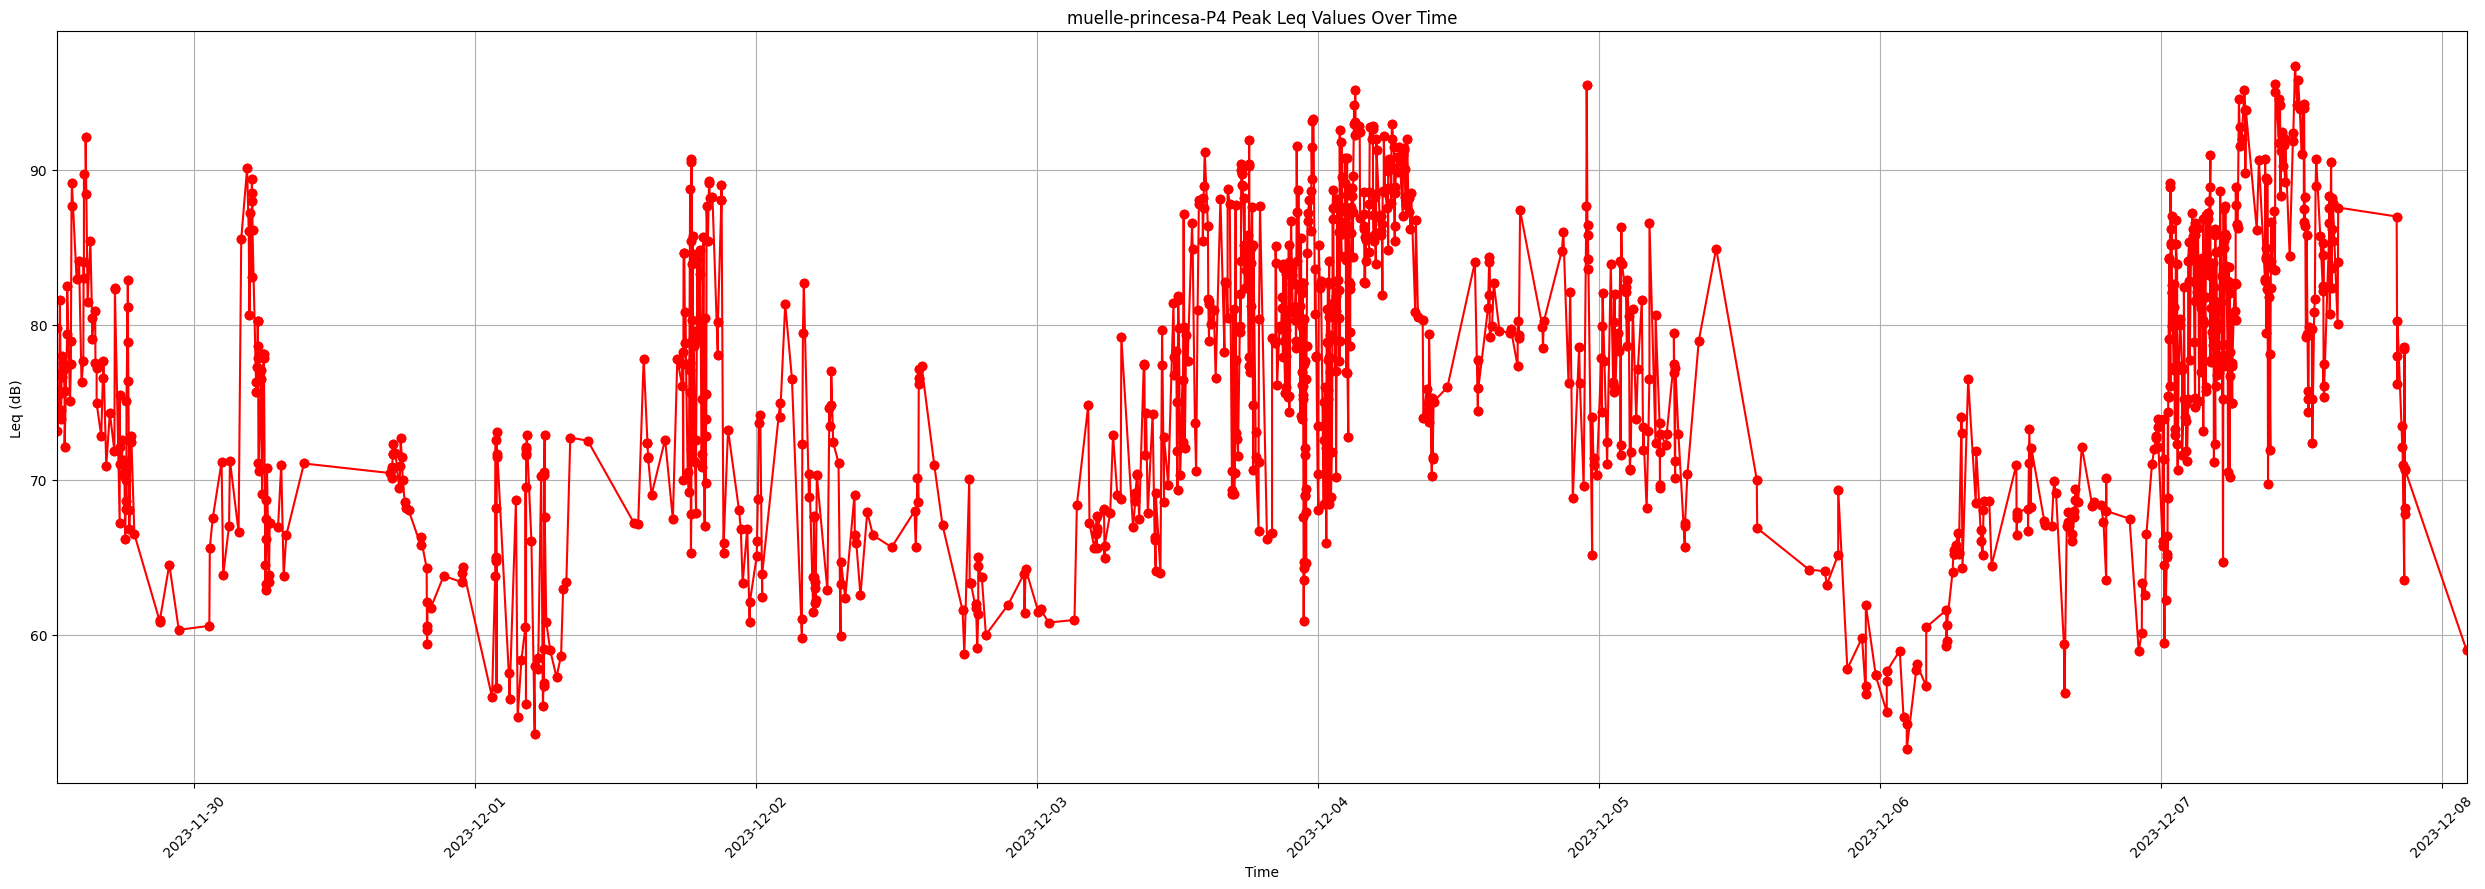

In [565]:
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])
df_merged.sort_values('start_time', inplace=True)

#plot leq over time
plt.figure(figsize=(25, 9))
plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title(f'{title} Peak Leq Values Over Time')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)
# adjust blank space in the beggining and end of the plot
plt.xlim(df_merged['start_time'].iloc[0], df_merged['start_time'].iloc[-1])
plt.tight_layout()
# plt.show()

#save the plot
plt.savefig(os.path.join(folder_output, f'{title}_peak_leq.png'))
df_merged.to_csv(os.path.join(folder_output, f'{title}_peak_leq.csv'))

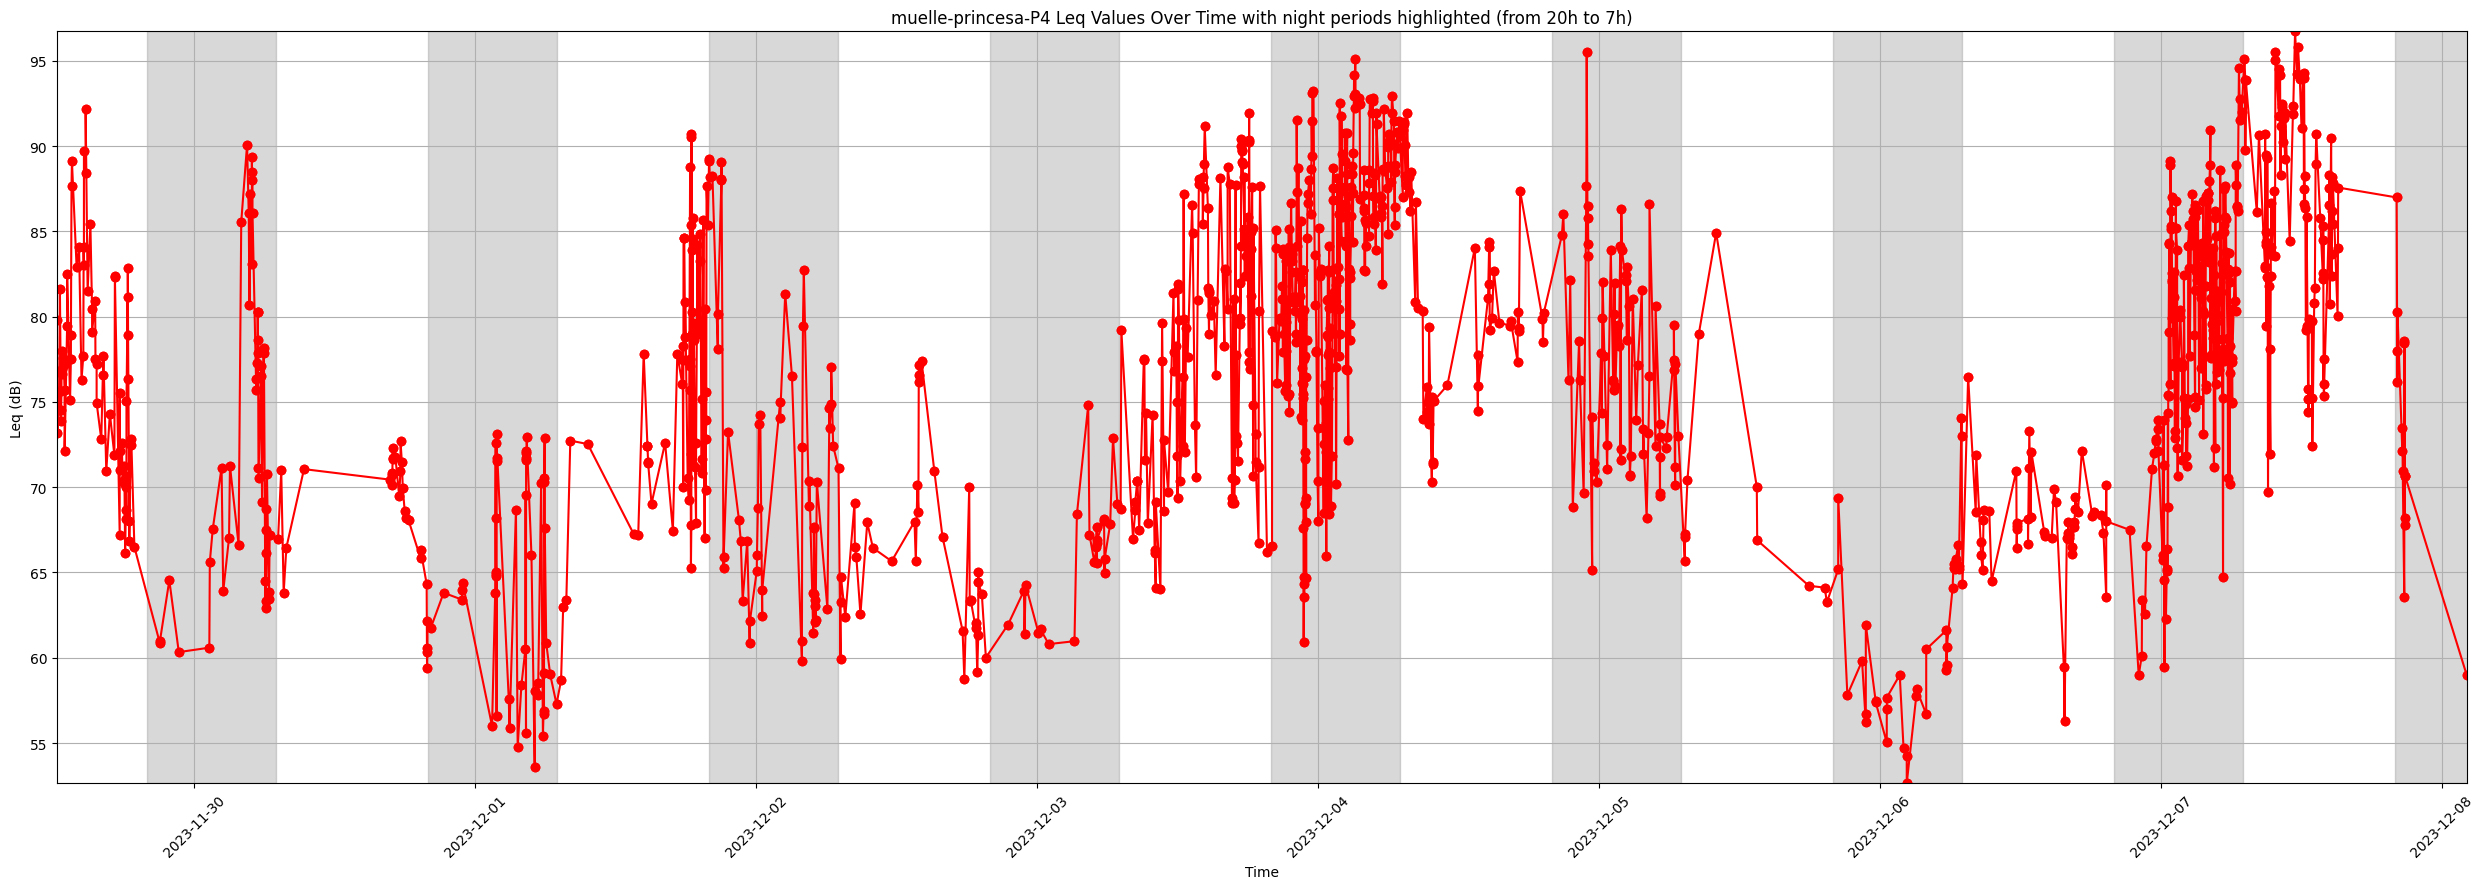

In [566]:
min_date = df_merged['start_time'].dt.date.min()
max_date = df_merged['start_time'].dt.date.max()

plt.figure(figsize=(25, 9))
plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
# highlighting night periods
for single_date in pd.date_range(min_date, max_date):
    start_night = pd.Timestamp.combine(single_date, pd.Timestamp('20:00:00').time())
    end_night = pd.Timestamp.combine(single_date + pd.Timedelta(days=1), pd.Timestamp('07:00:00').time())
    plt.fill_betweenx(y=[df_merged['LAeq'].min(), df_merged['LAeq'].max()], 
                      x1=start_night, x2=end_night, color='grey', alpha=0.3)

plt.title(f'{title} Leq Values Over Time with night periods highlighted (from 20h to 7h)')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(df_merged['start_time'].iloc[0], df_merged['start_time'].iloc[-1])
plt.ylim(df_merged['LAeq'].min(), df_merged['LAeq'].max())
plt.tight_layout()
# plt.show()

#save the plot
plt.savefig(os.path.join(folder_output, f'{title}_peak_leq_night.png'))
df_merged.to_csv(os.path.join(folder_output, f'{title}_peak_leq_night.csv'))

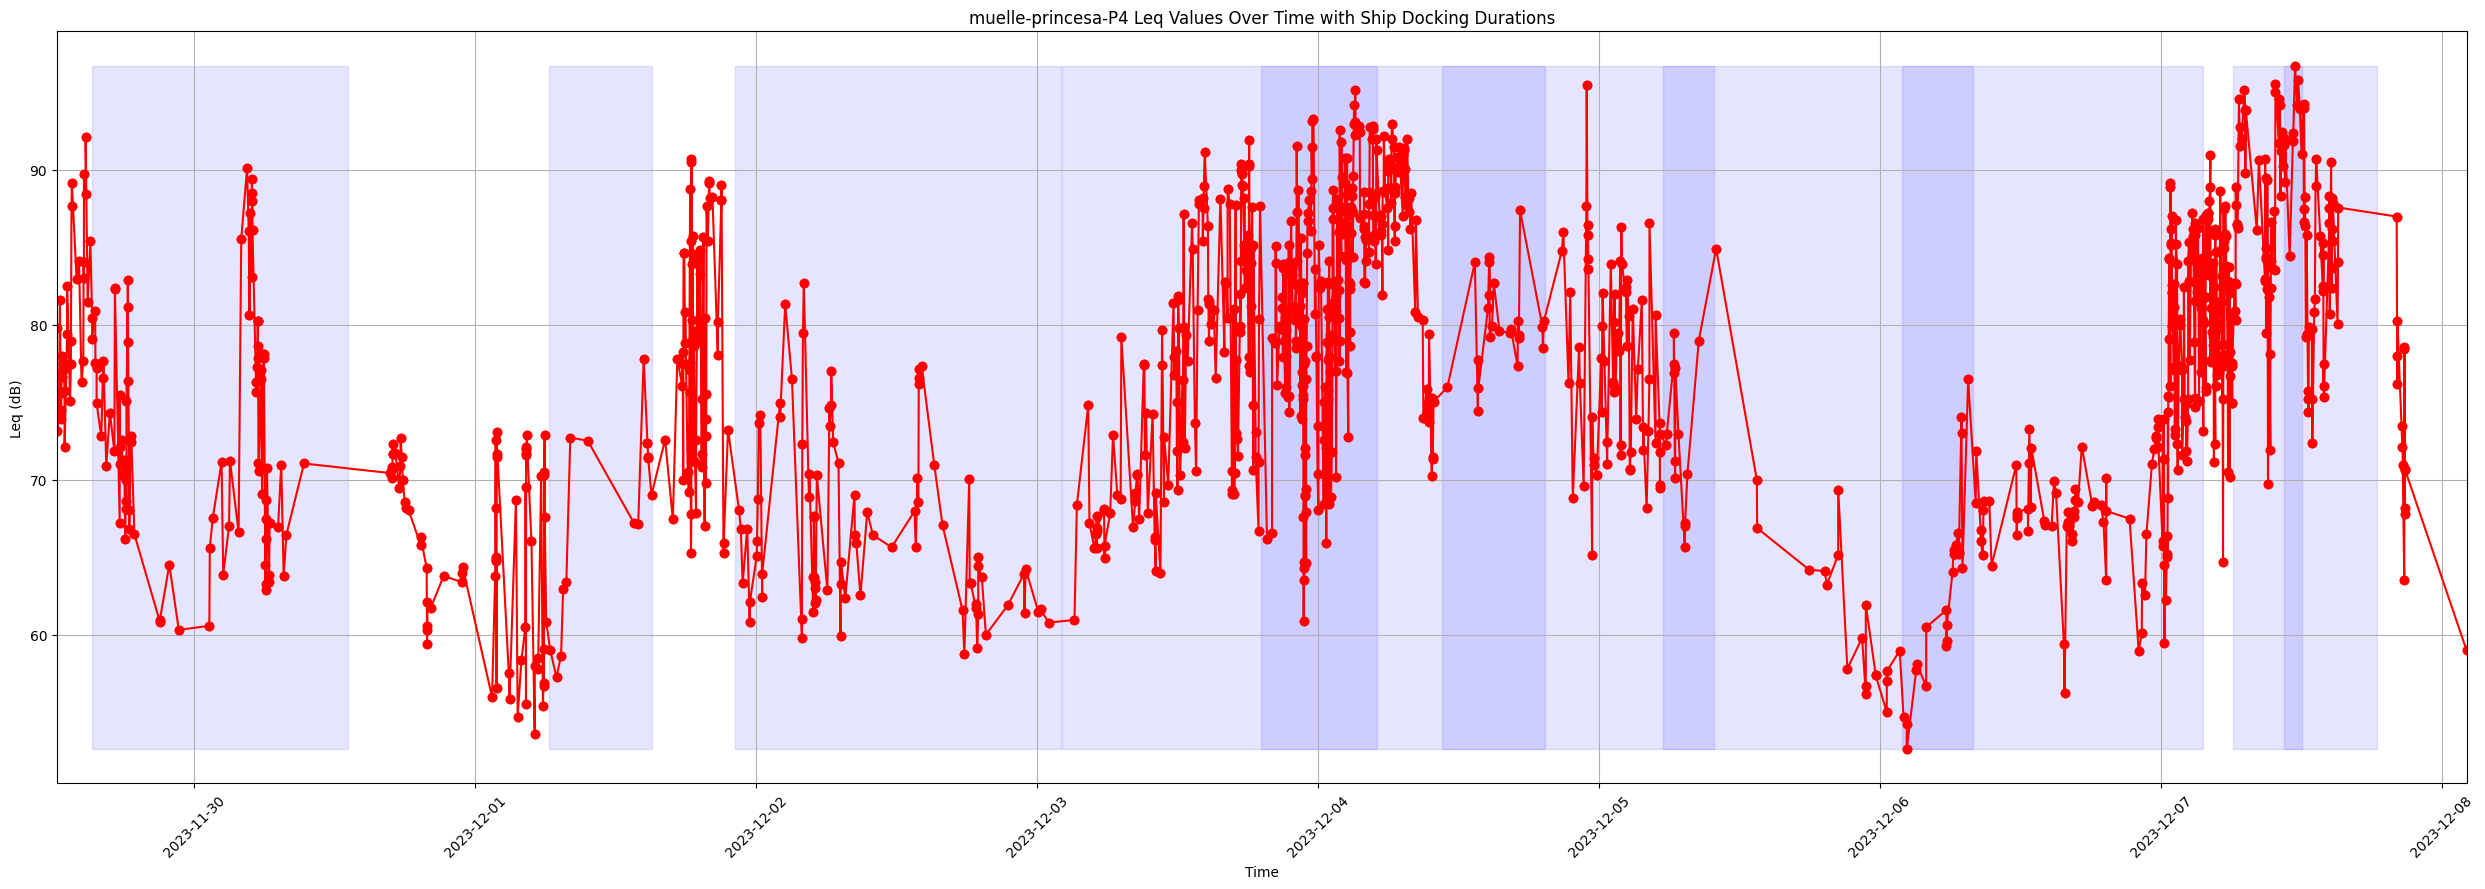

In [567]:
df_embarques['FECHA_HORA_ENTRADA_POR_PUNTAS'] = pd.to_datetime(
    df_embarques['FECHA_HORA_ENTRADA_POR_PUNTAS'], dayfirst=True, errors='coerce')

df_embarques['FECHA_HORA_SALIDA_POR_PUNTAS'] = pd.to_datetime(
    df_embarques['FECHA_HORA_SALIDA_POR_PUNTAS'], dayfirst=True, errors='coerce')

plt.figure(figsize=(25, 9))
plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')

for _, row in df_embarques.iterrows():
    plt.fill_betweenx(y=[df_merged['LAeq'].min(), df_merged['LAeq'].max()],
                      x1=row['FECHA_HORA_ENTRADA_POR_PUNTAS'], x2=row['FECHA_HORA_SALIDA_POR_PUNTAS'],
                      color='blue', alpha=0.1)

plt.title(f'{title} Leq Values Over Time with Ship Docking Durations')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(df_merged['start_time'].iloc[0], df_merged['start_time'].iloc[-1])
plt.tight_layout()
# plt.show()

#save the plot
plt.savefig(os.path.join(folder_output, f'{title}_peak_leq_ships.png'))
df_merged.to_csv(os.path.join(folder_output, f'{title}_peak_leq_ships.csv'))

# DF

In [568]:
df_merged

filename          start_time  \
0     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:17:18   
1     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:17:18   
2     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:19:49   
3     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:19:49   
4     \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-11-29 12:28:56   
...                                                 ...                 ...   
2481  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:49:13   
2482  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:50:28   
2483  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-07 20:50:28   
2484  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-08 02:06:41   
2485  \\192.168.205.117\AAC_Server\PUERTOS\NOISEPORT... 2023-12-08 02:06:41   

                 end_time  duration                    class  \
0     2023-11-29 12:17:25       7.5                  Bicycle   
1     2023-11-29 12:17:25       7.5                  Vehicle   
2     2023-11-29 12:19:51       2.5                     Wind   
3     2023-11-29 12:19:51       2.5  Wind noise (microphone)   
4     2023-11-29 12:28:57       1.5                  Vehicle   
...                   ...       ...                      ...   
2481  2023-12-07 20:49:14       1.5  Wind noise (microphone)   
2482  2023-12-07 20:50:31       3.5                   Speech   
2483  2023-12-07 20:50:31       3.5                  Vehicle   
2484  2023-12-08 02:06:44       3.5                   Animal   
2485  2023-12-08 02:06:44       3.5                     Frog   

                   predictions   LAeq                          LA_values  \
0      [0.3083945, 0.14657761]  79.81  [75.8, 78.23, 80.78, 80.0, 81.88]   
1      [0.3083945, 0.14657761]  79.81  [75.8, 78.23, 80.78, 80.0, 81.88]   
2      [0.2714036, 0.26486522]  73.15              [71.09, 74.59, 73.07]   
3      [0.2714036, 0.26486522]  73.15              [71.09, 74.59, 73.07]   
4      [0.1883349, 0.14215572]  74.54                     [72.94, 75.71]   
...                        ...    ...                                ...   
2481   [0.5022389, 0.48235774]  70.66                     [67.96, 72.31]   
2482  [0.19509986, 0.19083287]  70.68              [66.87, 70.87, 72.55]   
2483  [0.19509986, 0.19083287]  70.68              [66.87, 70.87, 72.55]   
2484  [0.11167023, 0.06489019]  59.00              [58.22, 58.69, 59.92]   
2485  [0.11167023, 0.06489019]  59.00              [58.22, 58.69, 59.92]   

            date  day  ...   day_name  indicador_str       night_str  \
0     2023-11-29   29  ...  Wednesday             Ld                   
1     2023-11-29   29  ...  Wednesday             Ld                   
2     2023-11-29   29  ...  Wednesday             Ld                   
3     2023-11-29   29  ...  Wednesday             Ld                   
4     2023-11-29   29  ...  Wednesday             Ld                   
...          ...  ...  ...        ...            ...             ...   
2481  2023-12-07    7  ...   Thursday             Le                   
2482  2023-12-07    7  ...   Thursday             Le                   
2483  2023-12-07    7  ...   Thursday             Le                   
2484  2023-12-08    8  ...     Friday             Ln  Jueves-Viernes   
2485  2023-12-08    8  ...     Friday             Ln  Jueves-Viernes   

             mid             display_name     iso_taxonomy  \
0       /m/0199g                  Bicycle    non motorized   
1       /m/07yv9                  Vehicle  Roadway traffic   
2     /m/03m9d0z                     Wind             Wind   
3     /t/dd00092  Wind noise (microphone)             Wind   
4       /m/07yv9                  Vehicle  Roadway traffic   
...          ...                      ...              ...   
2481  /t/dd00092  Wind noise (microphone)             Wind   
2482    /m/09x0r                   Speech            Vo

In [569]:
df_merged.columns

Index(['filename', 'start_time', 'end_time', 'duration', 'class',
       'predictions', 'LAeq', 'LA_values', 'date', 'day', 'hour', 'weekday',
       'day_name', 'indicador_str', 'night_str', 'mid', 'display_name',
       'iso_taxonomy', 'Brown_Level_2', 'Brown_Level_3', 'NoisePort_Level_1',
       'NoisePort_Level_2'],
      dtype='object')

## Density distribution of peaks data

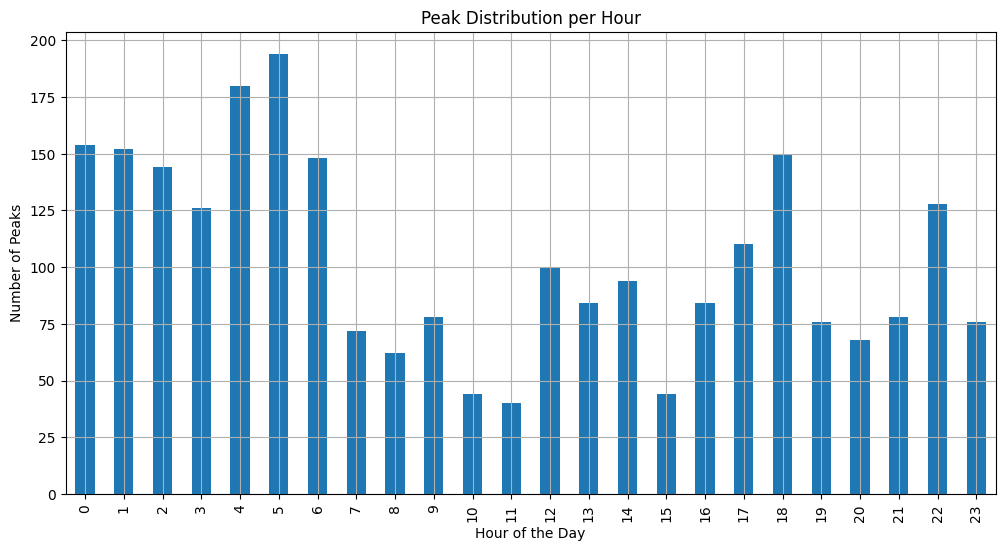

In [570]:
hourly_peaks = df_merged.groupby('hour').size()

plt.figure(figsize=(12, 6))

hourly_peaks.plot(kind='bar')
plt.title('Peak Distribution per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Peaks')
plt.grid(True)
plt.show()

# kernel density estimation

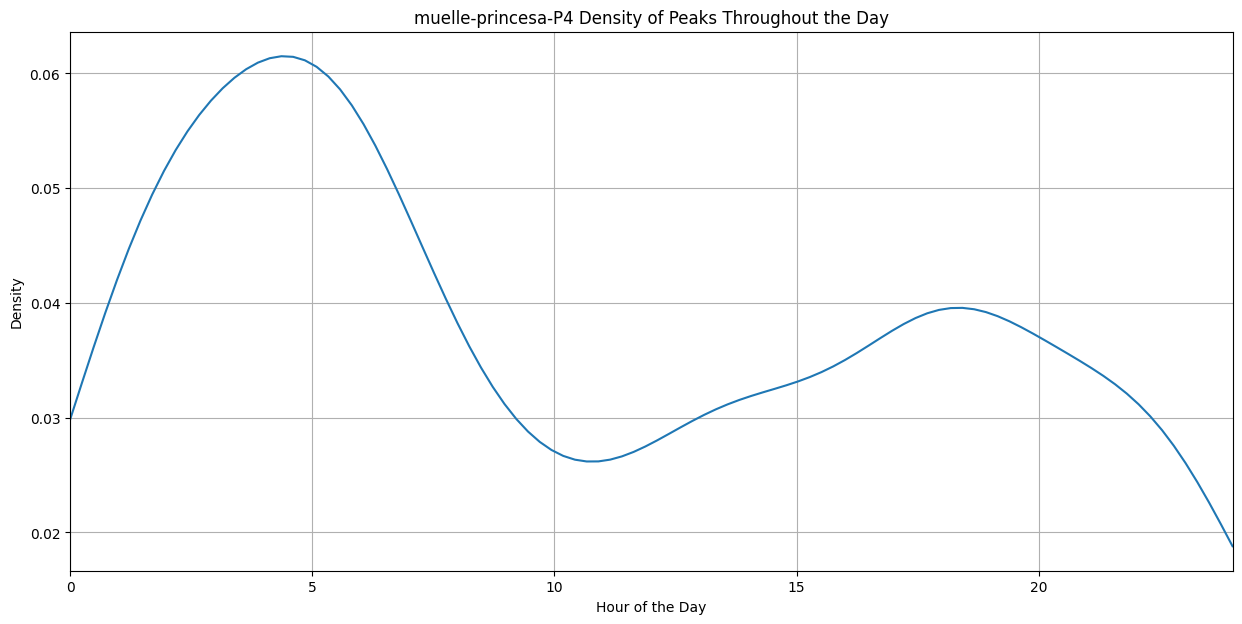

In [571]:
# data for KDE
time_of_day = df_merged['start_time'].dt.hour + df_merged['start_time'].dt.minute/60

# KDE plot
density = gaussian_kde(time_of_day)
xs = np.linspace(0,24,100)
density.covariance_factor = lambda : .25
density._compute_covariance()


plt.figure(figsize=(15, 7))

plt.plot(xs, density(xs))
plt.title(f'{title} Density of Peaks Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Density')
# adjust blank space in the beggining and end of the plot
plt.xlim(0, 24)
plt.grid(True)
# plt.show()

#save the plot
plt.savefig(os.path.join(folder_output, f'{title}_peak_density.png'))
df.to_csv(os.path.join(folder_output, f'{title}_peak_density.csv'))

# heat map 

In [572]:
df_merged.columns

Index(['filename', 'start_time', 'end_time', 'duration', 'class',
       'predictions', 'LAeq', 'LA_values', 'date', 'day', 'hour', 'weekday',
       'day_name', 'indicador_str', 'night_str', 'mid', 'display_name',
       'iso_taxonomy', 'Brown_Level_2', 'Brown_Level_3', 'NoisePort_Level_1',
       'NoisePort_Level_2'],
      dtype='object')

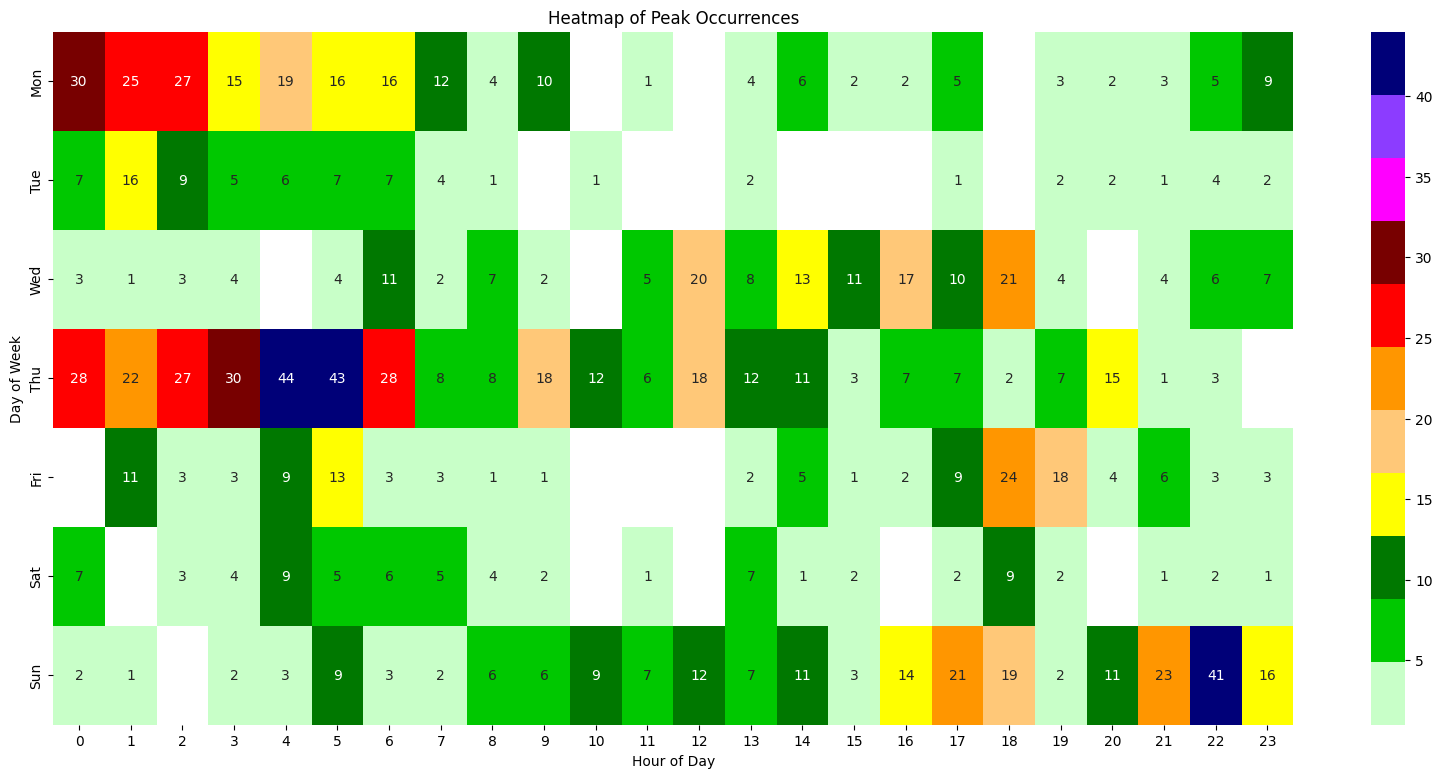

In [573]:
df['Day'] = df['start_time'].dt.dayofweek
df['Hour'] = df['start_time'].dt.hour

pivot_table = df.pivot_table(
    index='Day', 
    columns='Hour', 
    aggfunc='size',
)

pivot_table.replace(0, np.nan, inplace=True)

plt.figure(figsize=(20, 9))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=cmap_dict)
plt.title('Heatmap of Peak Occurrences')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
# plt.yticks(df.index.min(), df.index.max(), 1)
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), range(24))  
plt.show()

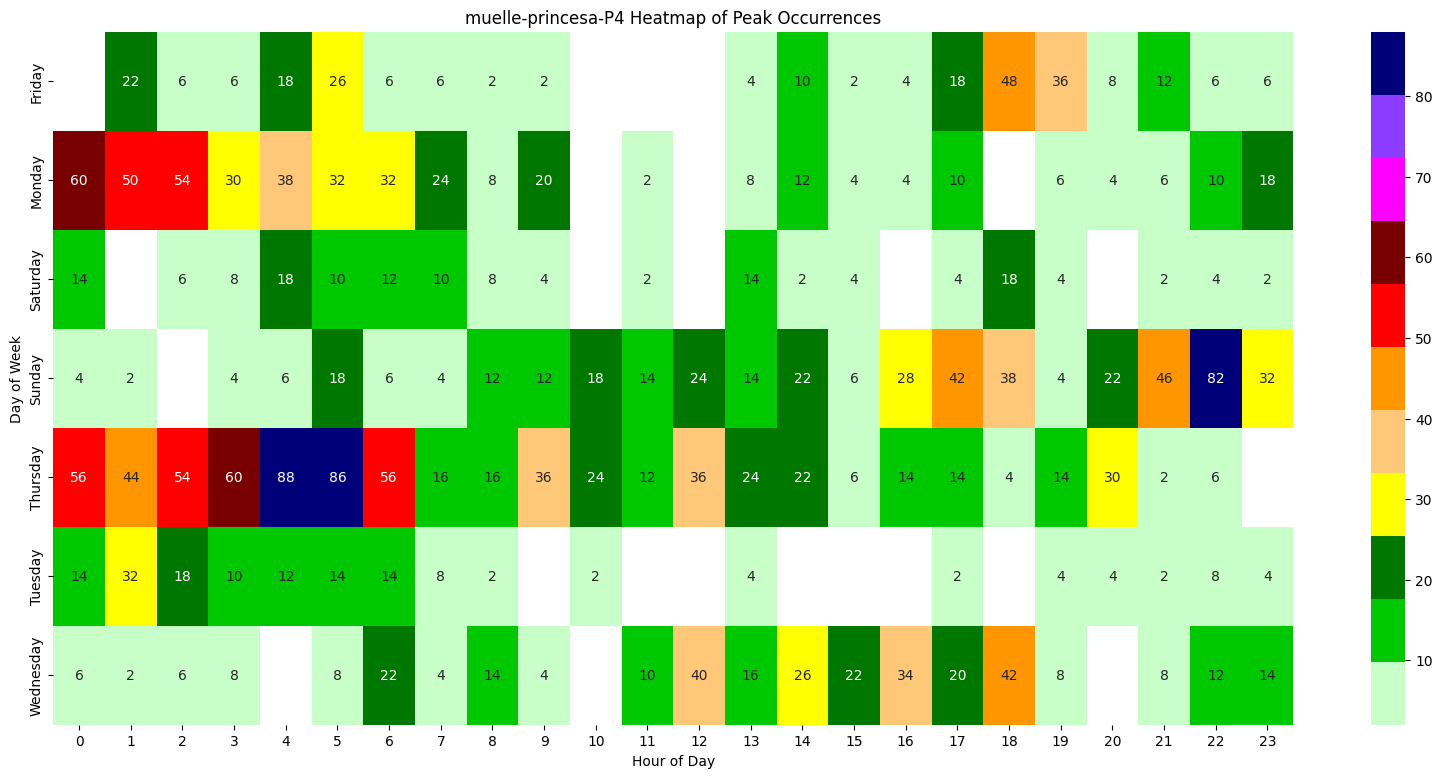

In [574]:
pivot_table = df_merged.pivot_table(
    index='day_name', 
    columns='hour', 
    aggfunc='size',
    )

pivot_table.replace(0, np.nan, inplace=True)

plt.figure(figsize=(20, 9))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap=cmap_dict)
plt.title(f'{title} Heatmap of Peak Occurrences')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.yticks(np.arange(0.5, len(pivot_table.index), 1), pivot_table.index)  # set the yticks to be the day of the week
plt.xticks(np.arange(0.5, len(pivot_table.columns), 1), range(24))  
# plt.show()

#save the plot
plt.savefig(os.path.join(folder_output, f'{title}_peak_heatmap.png'))
df.to_csv(os.path.join(folder_output, f'{title}_peak_heatmap.csv'))

Start date: 2023-11-29 12:17:18
End date: 2023-12-08 02:06:41


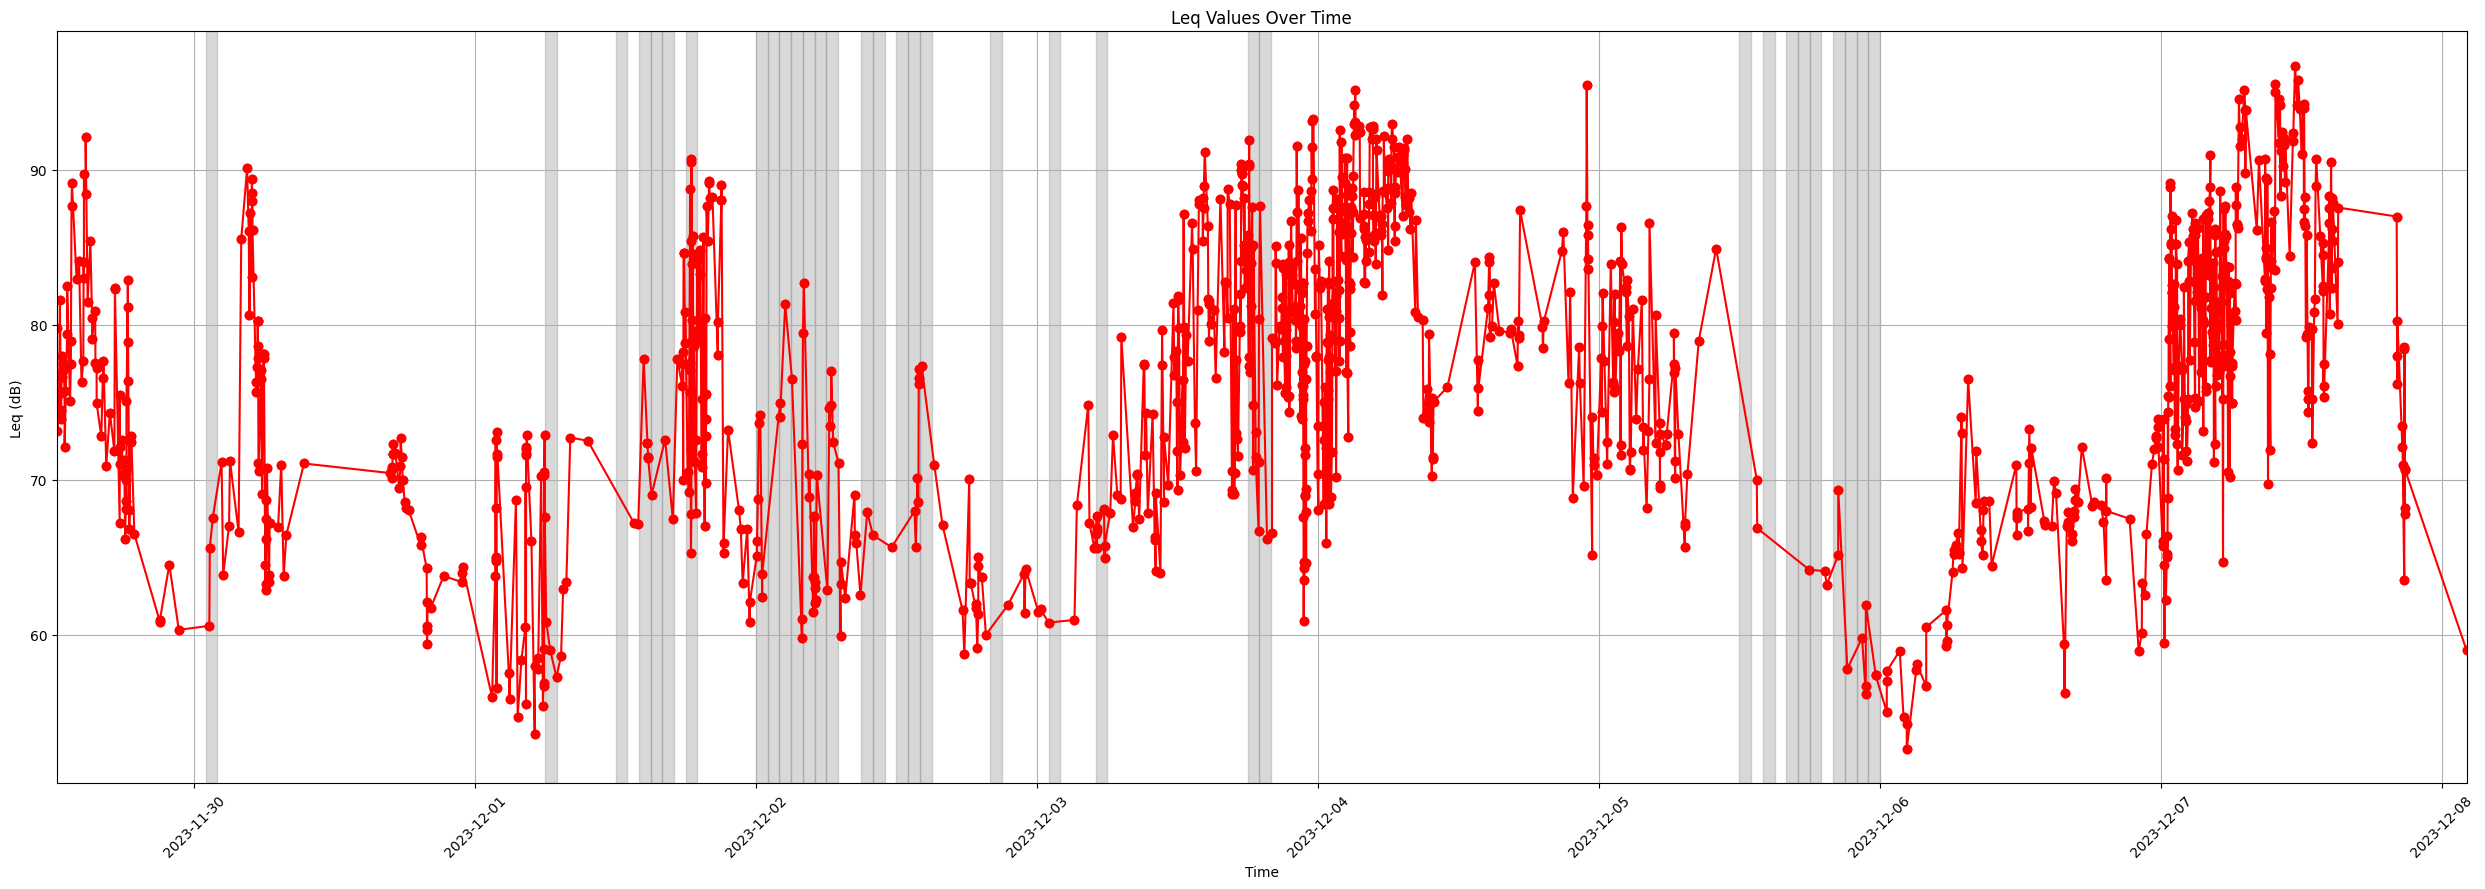

In [575]:
# print the end and start date
print(f"Start date: {start_date}")
print(f"End date: {end_date}")

df['Day'] = df['start_time'].dt.dayofweek
df['Hour'] = df['start_time'].dt.hour

pivot_table = df.pivot_table(
    index='Day', 
    columns='Hour', 
    aggfunc='size',
)

pivot_table.replace(0, np.nan, inplace=True)

# high density hours
threshold = 10 # threshold means the number of peaks in an hour to be considered as high density
high_density_hours = pivot_table.where(pivot_table > threshold).stack().index.tolist()

# laeq over time
plt.figure(figsize=(25, 9))
plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title('Leq Values Over Time')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)

# high-density periods
base_date = df_merged['start_time'].dt.date.min()

# go through the high density hours and highlight them
for day, hour in high_density_hours:
    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=hour)
    end_time = start_time + pd.Timedelta(hours=1)
    
    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)

# blank space in the beginning and end of the plot
plt.xlim(df_merged['start_time'].iloc[0], df_merged['start_time'].iloc[-1])
plt.tight_layout()
plt.show()

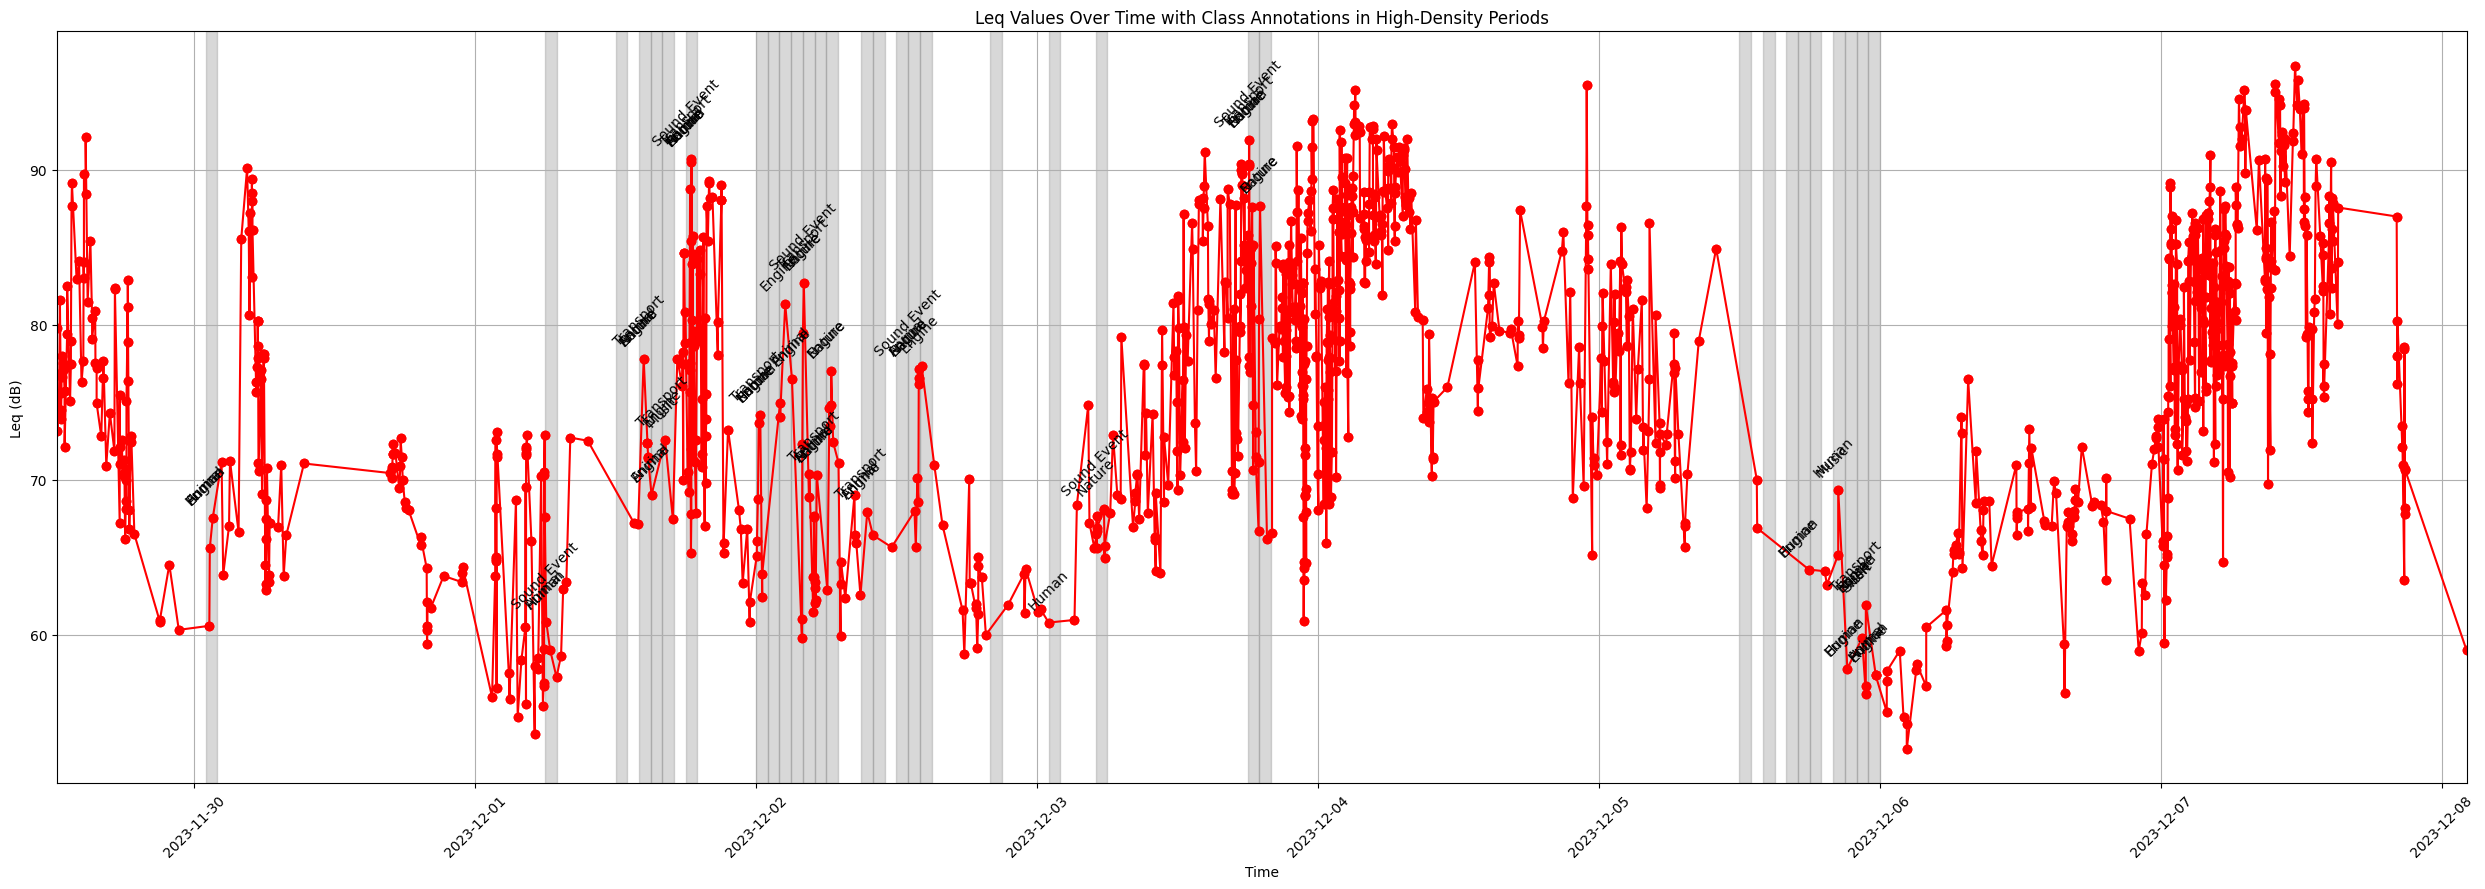

In [576]:
plt.figure(figsize=(25, 9))


plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title('Leq Values Over Time with Class Annotations in High-Density Periods')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)


for (day, hour) in high_density_hours:
    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=hour)
    end_time = start_time + pd.Timedelta(hours=1)
    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)

    mask = (df_merged['start_time'] >= start_time) & (df_merged['start_time'] < end_time)
    unique_classes = df_merged.loc[mask, 'NoisePort_Level_1'].unique()

    y_position = df_merged.loc[mask, 'LAeq'].max()  # find the maximum LAeq within this time span for positioning
    for cls in unique_classes:
        plt.annotate(cls, (start_time, y_position), textcoords="offset points", xytext=(0,10), ha='center', rotation=45)


plt.xlim(df_merged['start_time'].min(), df_merged['start_time'].max())
plt.tight_layout()
plt.show()

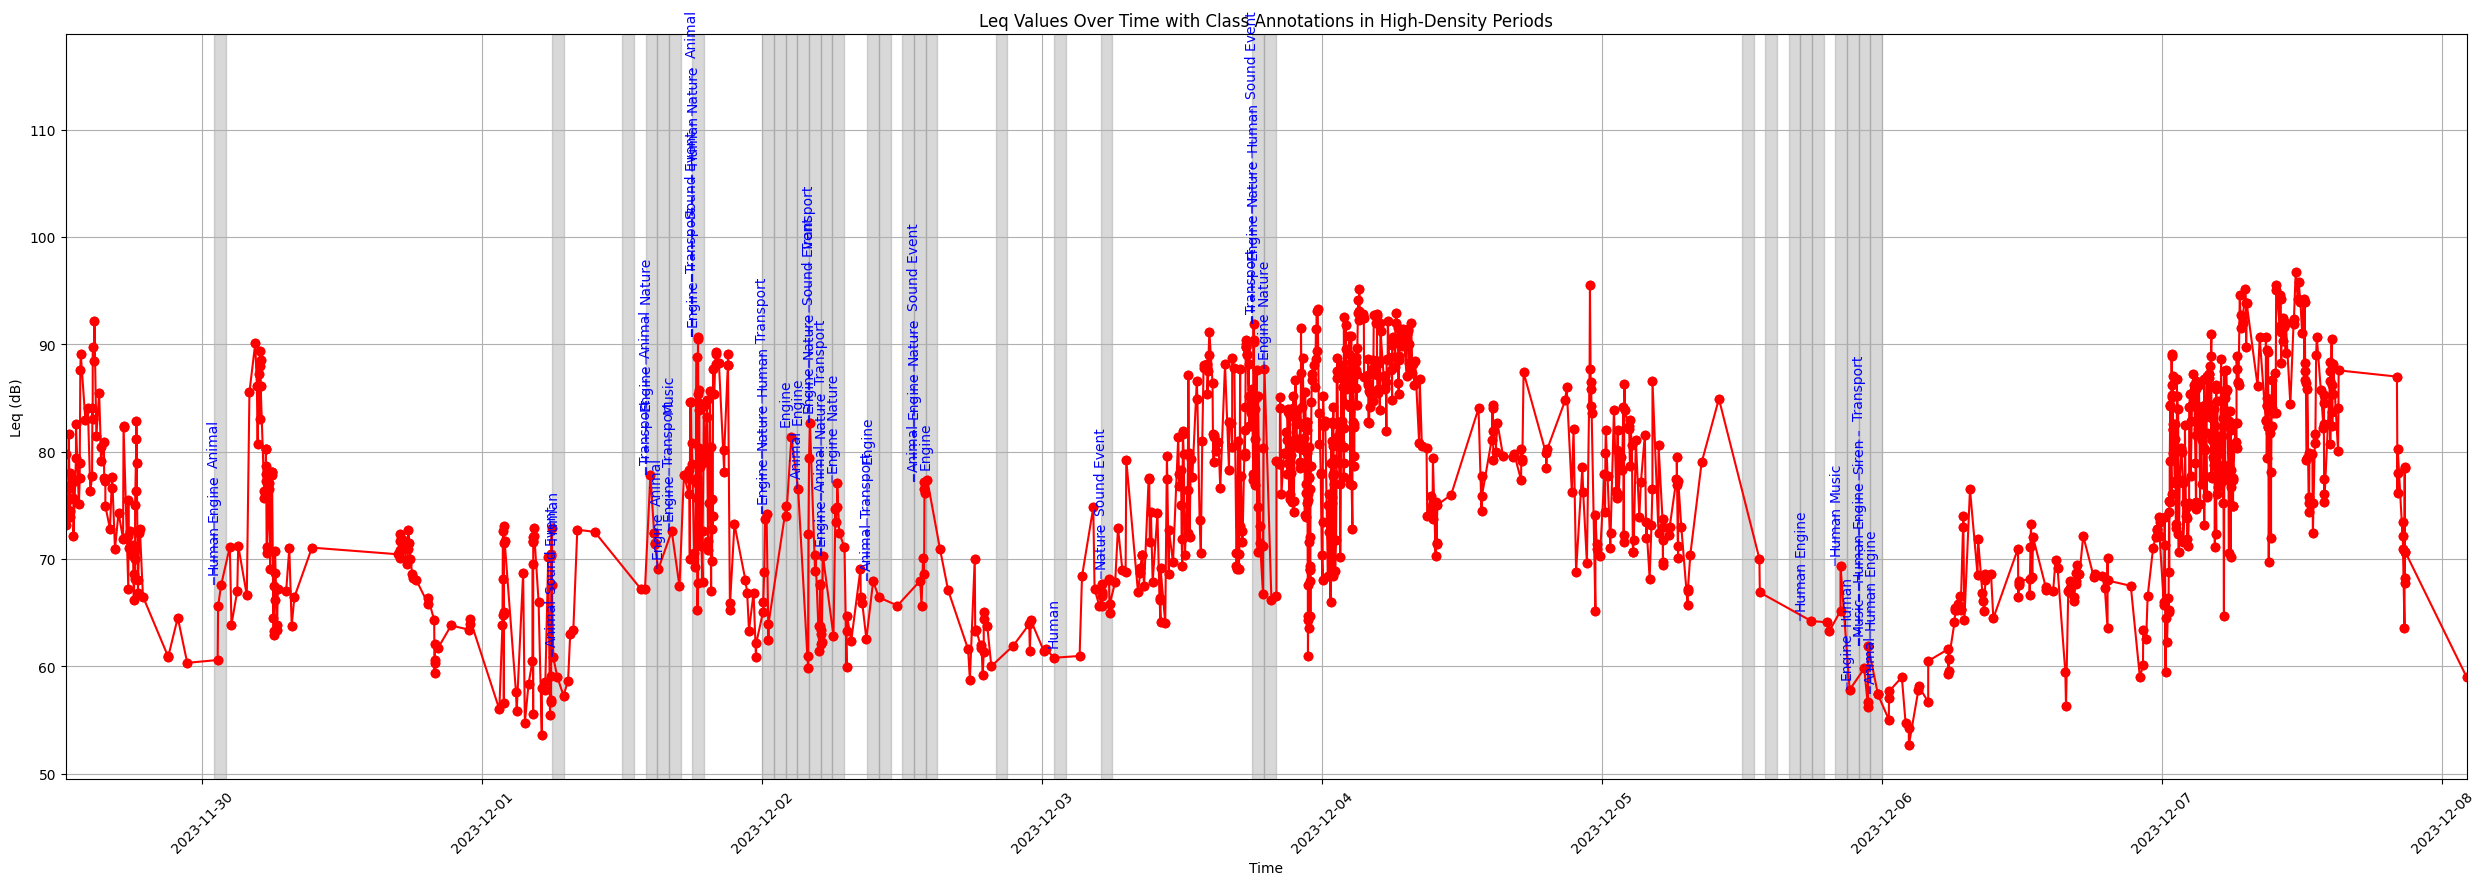

In [577]:
plt.figure(figsize=(25, 9))
plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title('Leq Values Over Time with Class Annotations in High-Density Periods')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)

for (day, hour) in high_density_hours:
    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=hour)
    end_time = start_time + pd.Timedelta(hours=1)
    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)

    mask = (df_merged['start_time'] >= start_time) & (df_merged['start_time'] < end_time)
    unique_classes = df_merged.loc[mask, 'NoisePort_Level_1'].unique()

    y_position = df_merged.loc[mask, 'LAeq'].max()  # find the maximum LAeq within this time span for positioning
    for idx, cls in enumerate(unique_classes):
        annotation_y = y_position + 5 * idx  # offset each annotation slightly above the last
        plt.annotate(cls, (start_time, annotation_y), textcoords="offset points", xytext=(0,10), ha='center', rotation=90, color='blue')
        plt.plot([start_time, start_time], [y_position, annotation_y], linestyle="--", color='blue', alpha=0.5)  # connect point to annotation
        

plt.xlim(df_merged['start_time'].min(), df_merged['start_time'].max())
plt.tight_layout()
plt.show()

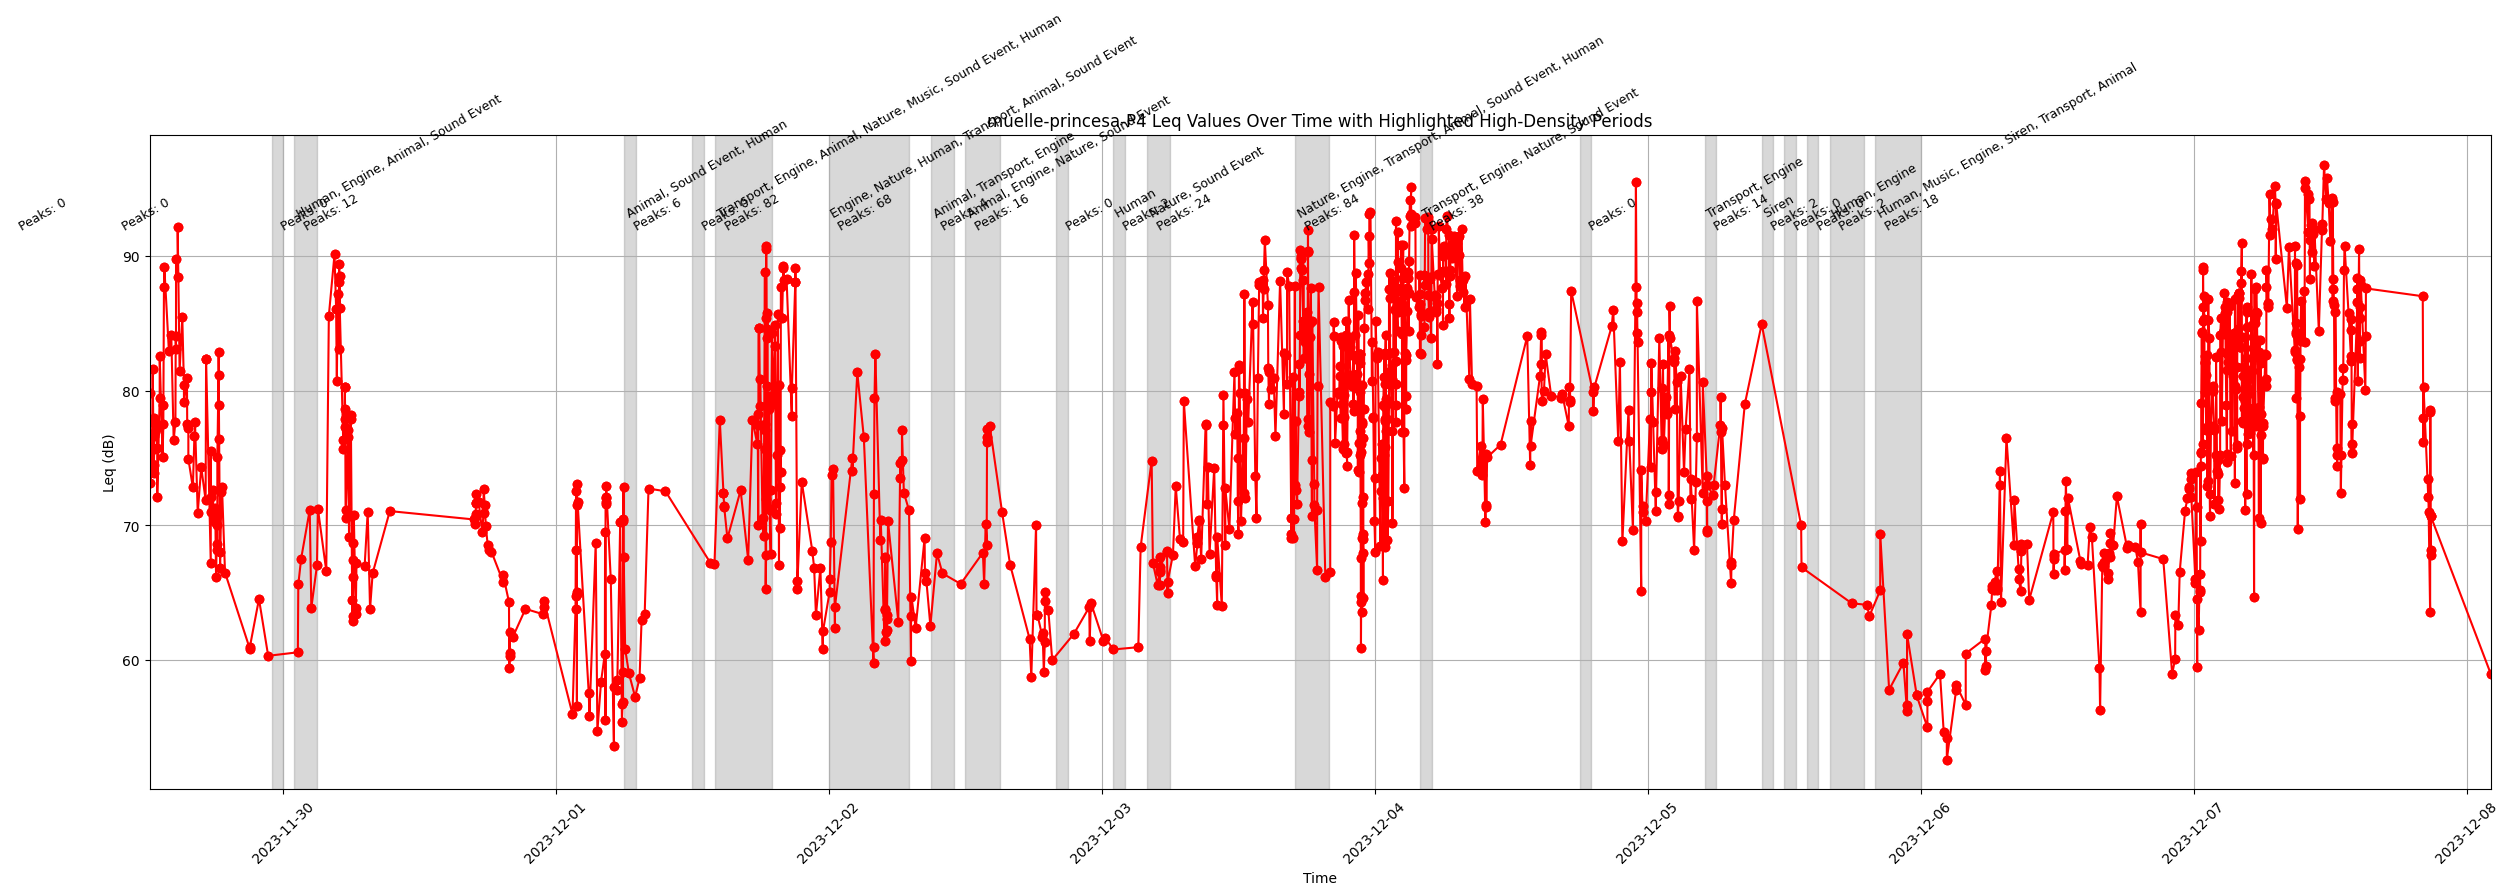

In [578]:
# high density hours
threshold = 8 # threshold means the number of peaks in an hour to be considered as high density
high_density_hours = pivot_table.where(pivot_table > threshold).stack().index.tolist()

plt.figure(figsize=(25, 9))

plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title(f'{title} Leq Values Over Time with Highlighted High-Density Periods')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)

high_density_classes = {}
processed_hours = set()
high_density_hours_sorted = sorted(high_density_hours)
high_density_counts = {}

for i, (day, hour) in enumerate(high_density_hours_sorted):
    if (day, hour) in processed_hours:
        continue

    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=hour)
    end_time = start_time + pd.Timedelta(hours=1)

    consecutive_non_density = 0
    j = i
    while j < len(high_density_hours_sorted) and consecutive_non_density < 2:
        next_day, next_hour = high_density_hours_sorted[j]
        next_start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=next_day)))
        next_start_time = next_start_of_day + pd.Timedelta(hours=next_hour)
        if next_start_time == end_time:
            end_time += pd.Timedelta(hours=1)
            processed_hours.add((next_day, next_hour))
            consecutive_non_density = 0
        else:
            consecutive_non_density += 1
        j += 1

    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)

    mask = (df_merged['start_time'] >= start_time) & (df_merged['start_time'] < end_time)
    unique_classes = df_merged.loc[mask, 'NoisePort_Level_1'].unique()
    high_density_classes[(start_time, end_time)] = unique_classes
    count_peaks = df_merged.loc[mask].shape[0]
    high_density_counts[(start_time, end_time)] = count_peaks

    # Annotation for the high-density period including class and number of peaks
    annotation_text = f"{', '.join(unique_classes)} \nPeaks: {count_peaks}"
    plt.text(start_time, df_merged['LAeq'].max() * 0.95, annotation_text, fontsize=9, rotation=30, ha='left')

plt.xlim(df_merged['start_time'].min(), df_merged['start_time'].max())
plt.tight_layout()

# Save the plot and data
plt.savefig(os.path.join(folder_output, f'{title}_peak_leq_high_density.png'))
df_merged.to_csv(os.path.join(folder_output, f'{title}_peak_leq_high_density.csv'))

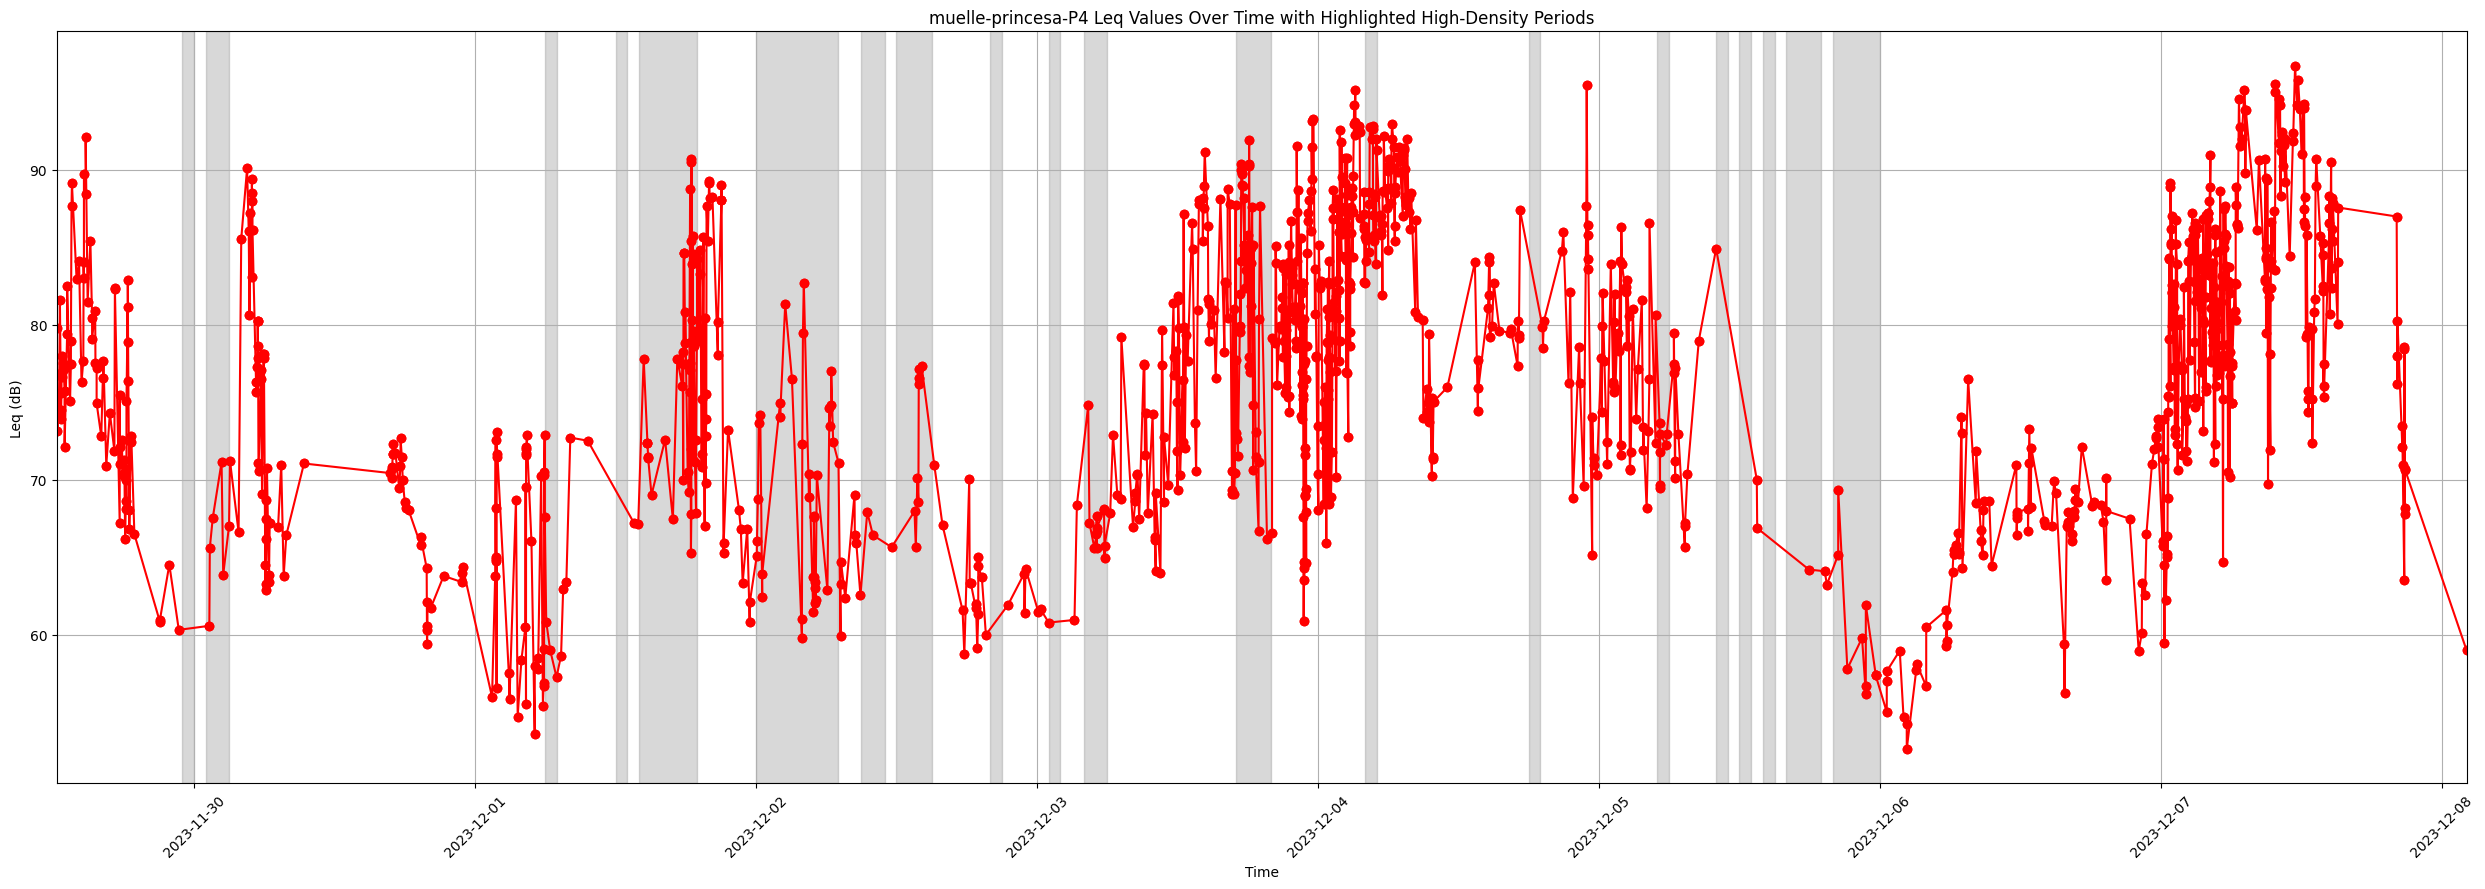

High-density period from 2023-11-29 00:00:00 to 2023-11-29 08:00:00 includes classes: 
High-density period from 2023-11-29 09:00:00 to 2023-11-29 10:00:00 includes classes: 
High-density period from 2023-11-29 23:00:00 to 2023-11-30 00:00:00 includes classes: 
High-density period from 2023-11-30 01:00:00 to 2023-11-30 03:00:00 includes classes: Human, Engine, Animal, Sound Event
High-density period from 2023-12-01 06:00:00 to 2023-12-01 07:00:00 includes classes: Animal, Sound Event, Human
High-density period from 2023-12-01 12:00:00 to 2023-12-01 13:00:00 includes classes: 
High-density period from 2023-12-01 14:00:00 to 2023-12-01 19:00:00 includes classes: Transport, Engine, Animal, Nature, Music, Sound Event, Human
High-density period from 2023-12-02 00:00:00 to 2023-12-02 07:00:00 includes classes: Engine, Nature, Human, Transport, Animal, Sound Event
High-density period from 2023-12-02 09:00:00 to 2023-12-02 11:00:00 includes classes: Animal, Transport, Engine
High-density period

In [579]:
plt.figure(figsize=(25, 9))

plt.plot(df_merged['start_time'], df_merged['LAeq'], marker='o', linestyle='-', color='red')
plt.title(f'{title} Leq Values Over Time with Highlighted High-Density Periods')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)

high_density_classes = {}
processed_hours = set()
high_density_hours_sorted = sorted(high_density_hours)

for i, (day, hour) in enumerate(high_density_hours_sorted):
    if (day, hour) in processed_hours:
        continue  # skiping this hour if it has already been processed

    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=hour)
    end_time = start_time + pd.Timedelta(hours=1)

    # check for continuity in high-density periods
    consecutive_non_density = 0
    j = i
    while j < len(high_density_hours_sorted) and consecutive_non_density < 2:
        next_day, next_hour = high_density_hours_sorted[j]
        next_start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=next_day)))
        next_start_time = next_start_of_day + pd.Timedelta(hours=next_hour)
        if next_start_time == end_time:
            end_time += pd.Timedelta(hours=1)
            processed_hours.add((next_day, next_hour))
            consecutive_non_density = 0  # reset consecutive non-density counter
        else:
            consecutive_non_density += 1  # increment if there is a gap
        j += 1

    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)

    mask = (df_merged['start_time'] >= start_time) & (df_merged['start_time'] < end_time)
    unique_classes = df_merged.loc[mask, 'NoisePort_Level_1'].unique()

    high_density_classes[(start_time, end_time)] = unique_classes

plt.xlim(df_merged['start_time'].min(), df_merged['start_time'].max())
plt.tight_layout()
plt.show()


high_density_counts = {}
for period, classes in high_density_classes.items():
    print(f"High-density period from {period[0]} to {period[1]} includes classes: {', '.join(classes)}")
    start_time, end_time = period
    mask = (df_merged['start_time'] >= start_time) & (df_merged['start_time'] < end_time)
    high_density_counts[period] = df_merged.loc[mask].shape[0]

for period, count in high_density_counts.items():
    print(f"High-density period from {period[0]} to {period[1]} has {count} peaks")

# print how many high-density periods are there
print(f"Total number of high-density periods: {len(high_density_counts)}")



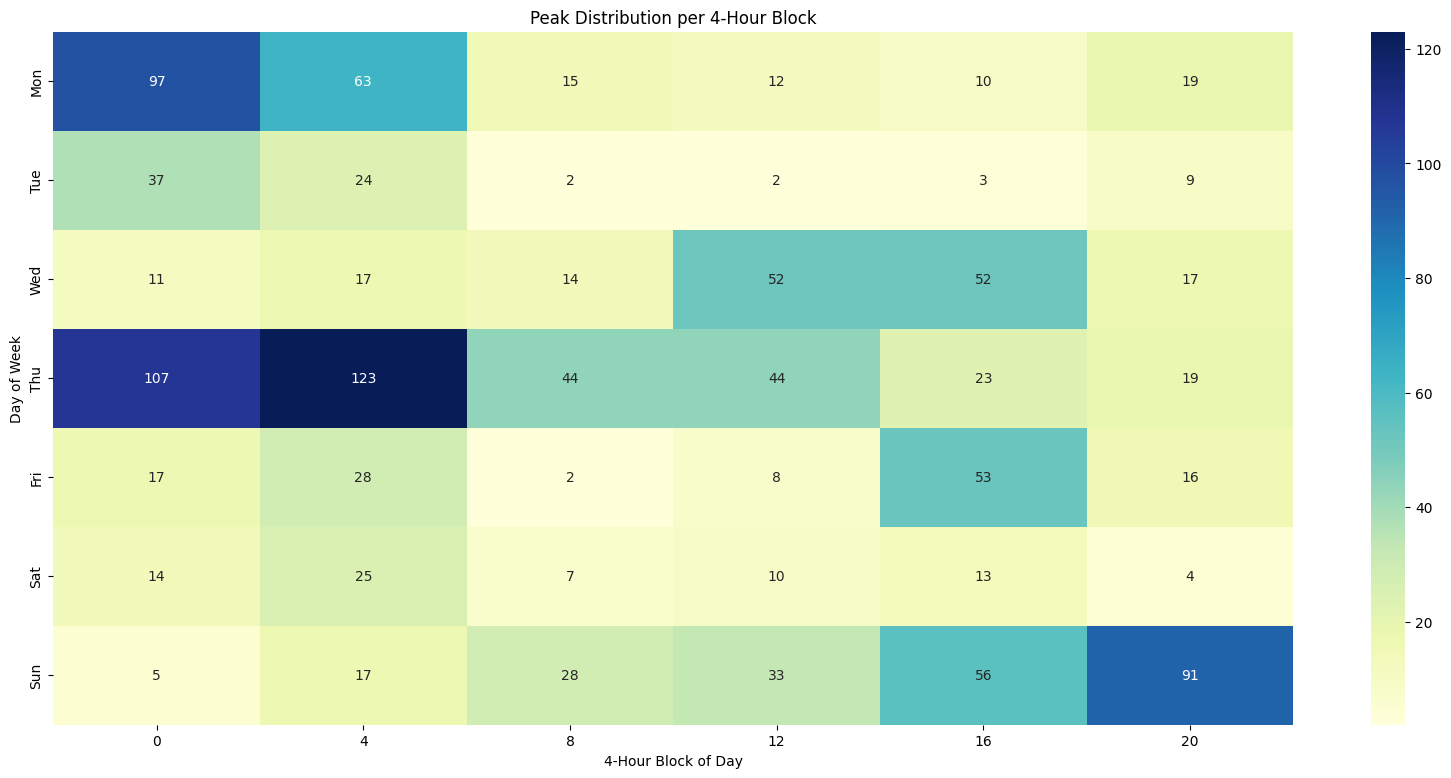

In [580]:
# 4h hourly blocks
df['4HourBlock'] = (df['start_time'].dt.hour // 4) * 4

pivot_table_4h = df.pivot_table(
    index='Day', 
    columns='4HourBlock', 
    aggfunc='size', 
    fill_value=0
)

plt.figure(figsize=(20, 9))
sns.heatmap(pivot_table_4h, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Peak Distribution per 4-Hour Block')
plt.xlabel('4-Hour Block of Day')
plt.ylabel('Day of Week')
plt.yticks(np.arange(0.5, len(pivot_table_4h.index), 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

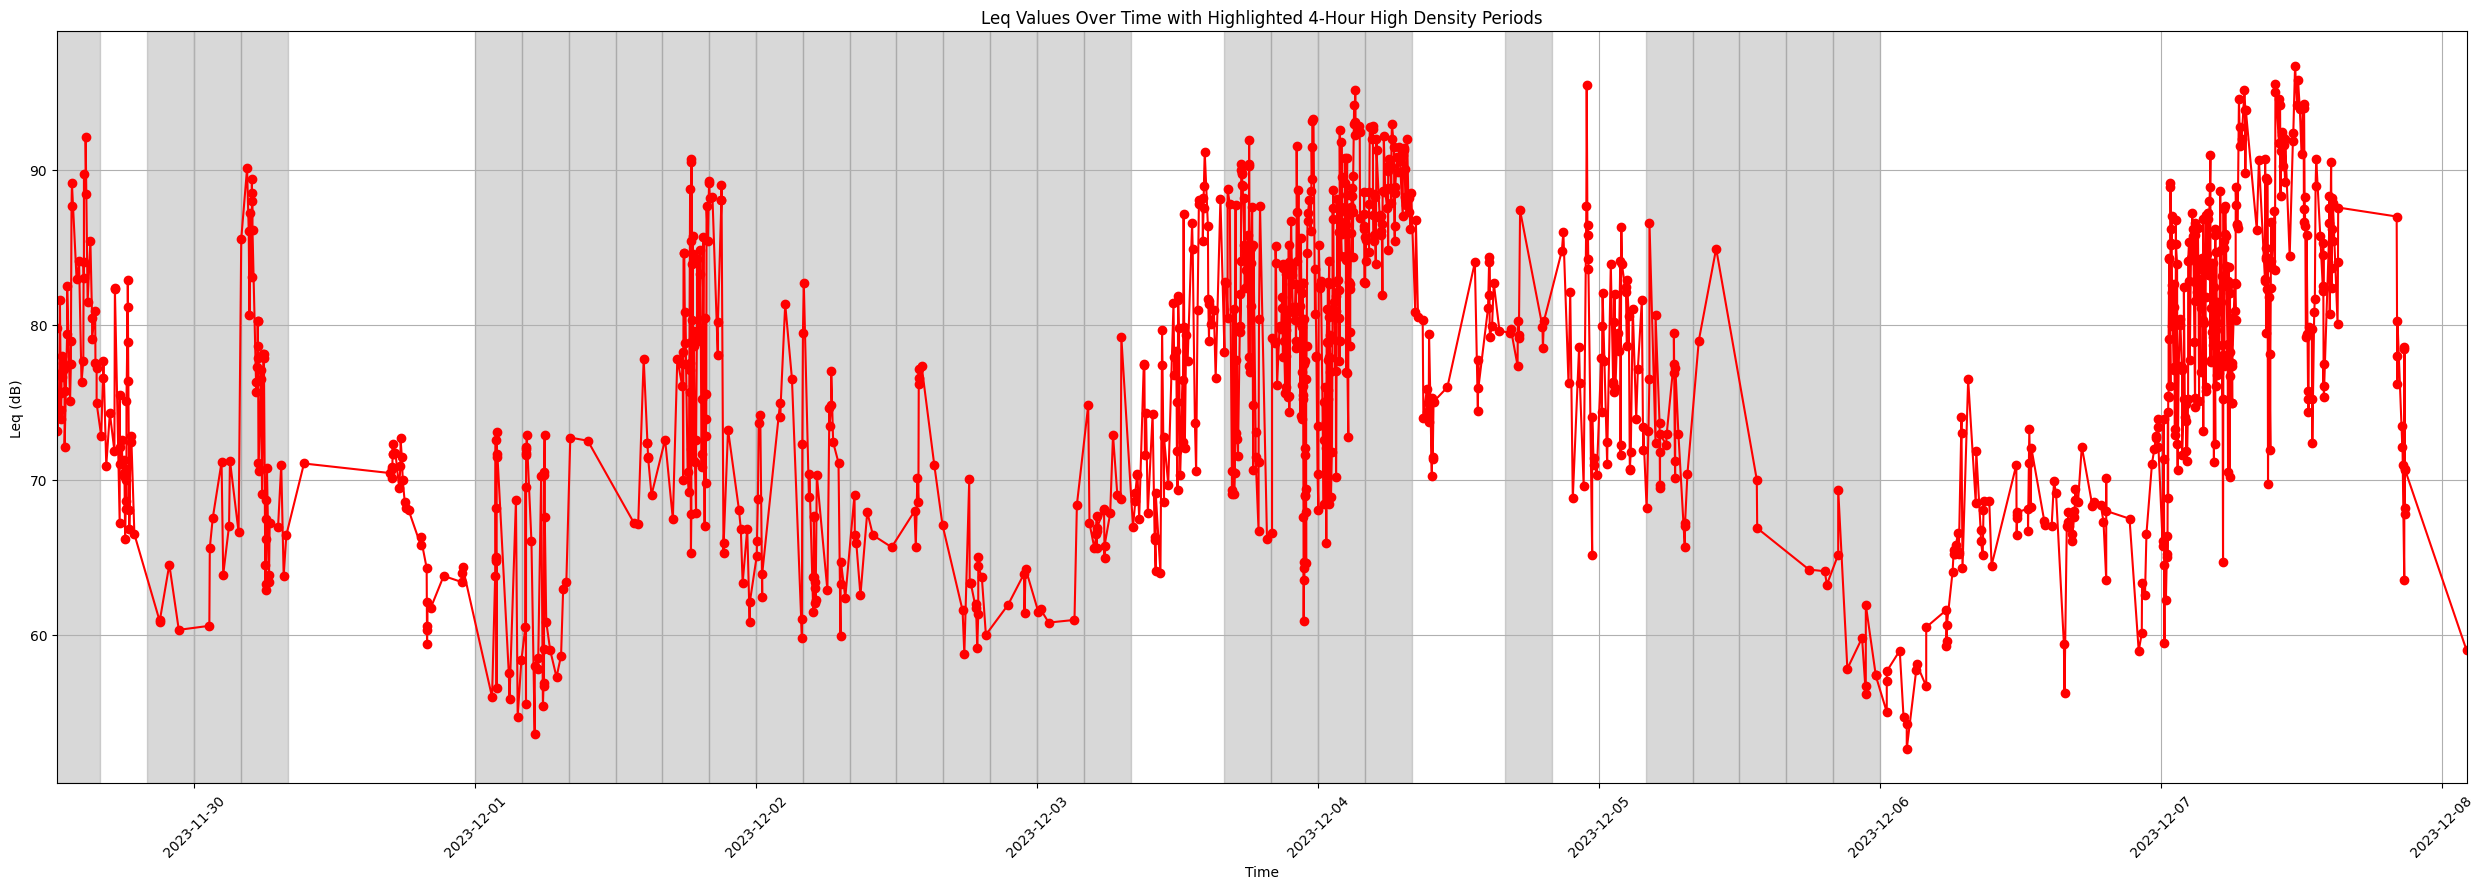

In [581]:
threshold =10
high_density_blocks = pivot_table_4h.where(pivot_table_4h > threshold).stack().index.tolist()


plt.figure(figsize=(25, 9))
plt.plot(df['start_time'], df['leq'], marker='o', linestyle='-', color='red')
plt.title('Leq Values Over Time with Highlighted 4-Hour High Density Periods')
plt.xlabel('Time')
plt.ylabel('Leq (dB)')
plt.grid(True)
plt.xticks(rotation=45)

# high-density 4-hour periods
base_date = df['start_time'].dt.date.min() 

for day, block_start_hour in high_density_blocks:
    start_of_day = pd.Timestamp(str(base_date + pd.Timedelta(days=day)))
    start_time = start_of_day + pd.Timedelta(hours=block_start_hour)
    end_time = start_time + pd.Timedelta(hours=4)  
    
    plt.axvspan(start_time, end_time, color='grey', alpha=0.3)  

plt.xlim(df['start_time'].iloc[0], df['start_time'].iloc[-1])
plt.tight_layout()
plt.show()

### Testing diferents plots

# box plot

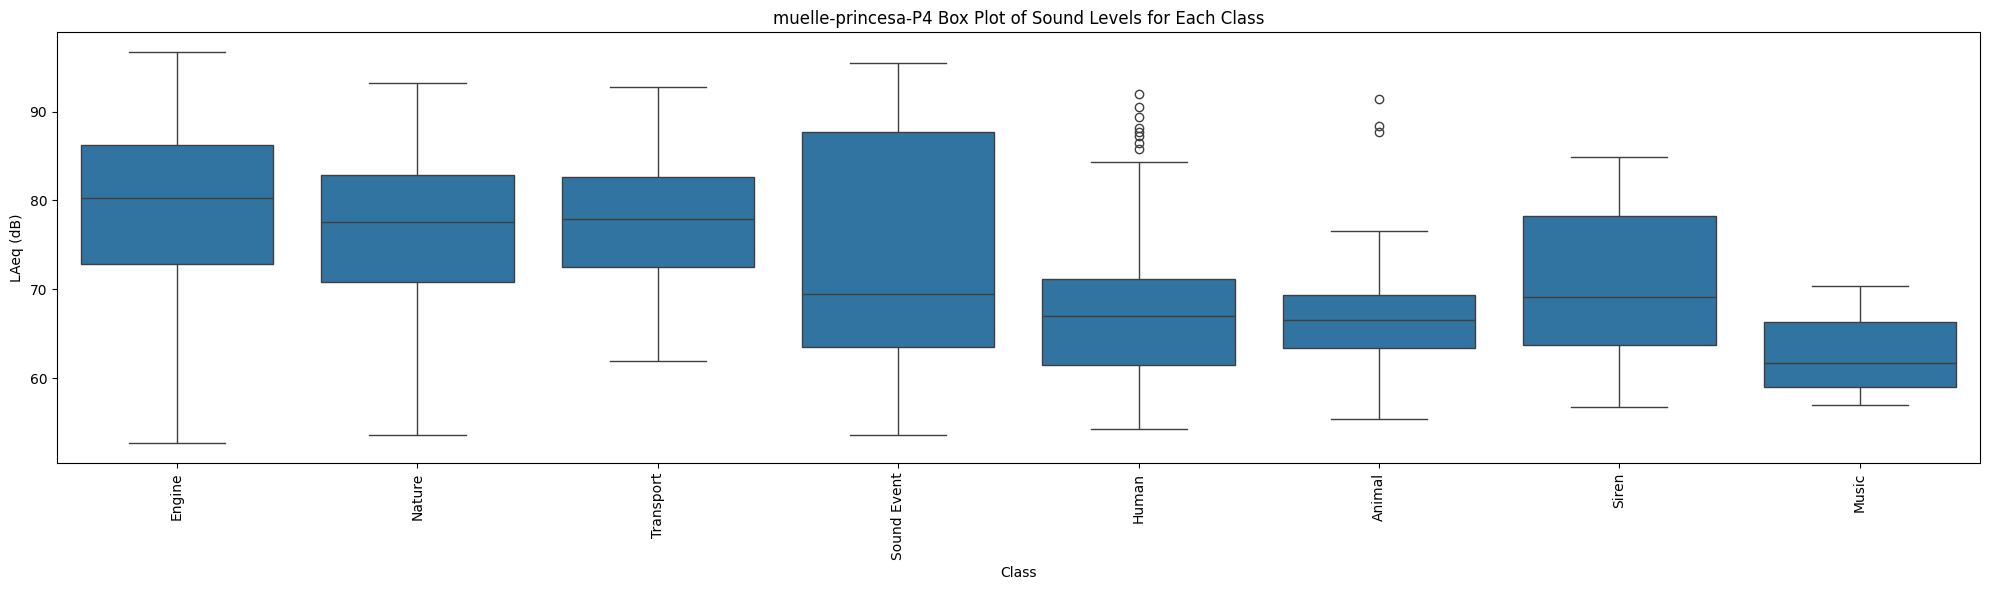

In [582]:
plt.figure(figsize=(20, 6))

sns.boxplot(data=df_merged, x='NoisePort_Level_1', y='LAeq')
plt.xticks(rotation=90)

plt.title(f'{title} Box Plot of Sound Levels for Each Class')
plt.xlabel('Class')
plt.ylabel('LAeq (dB)')
plt.tight_layout()
# plt.show()

# save the plot
plt.savefig(os.path.join(folder_output, f'{title}_box_plot.png'))

# bar plot

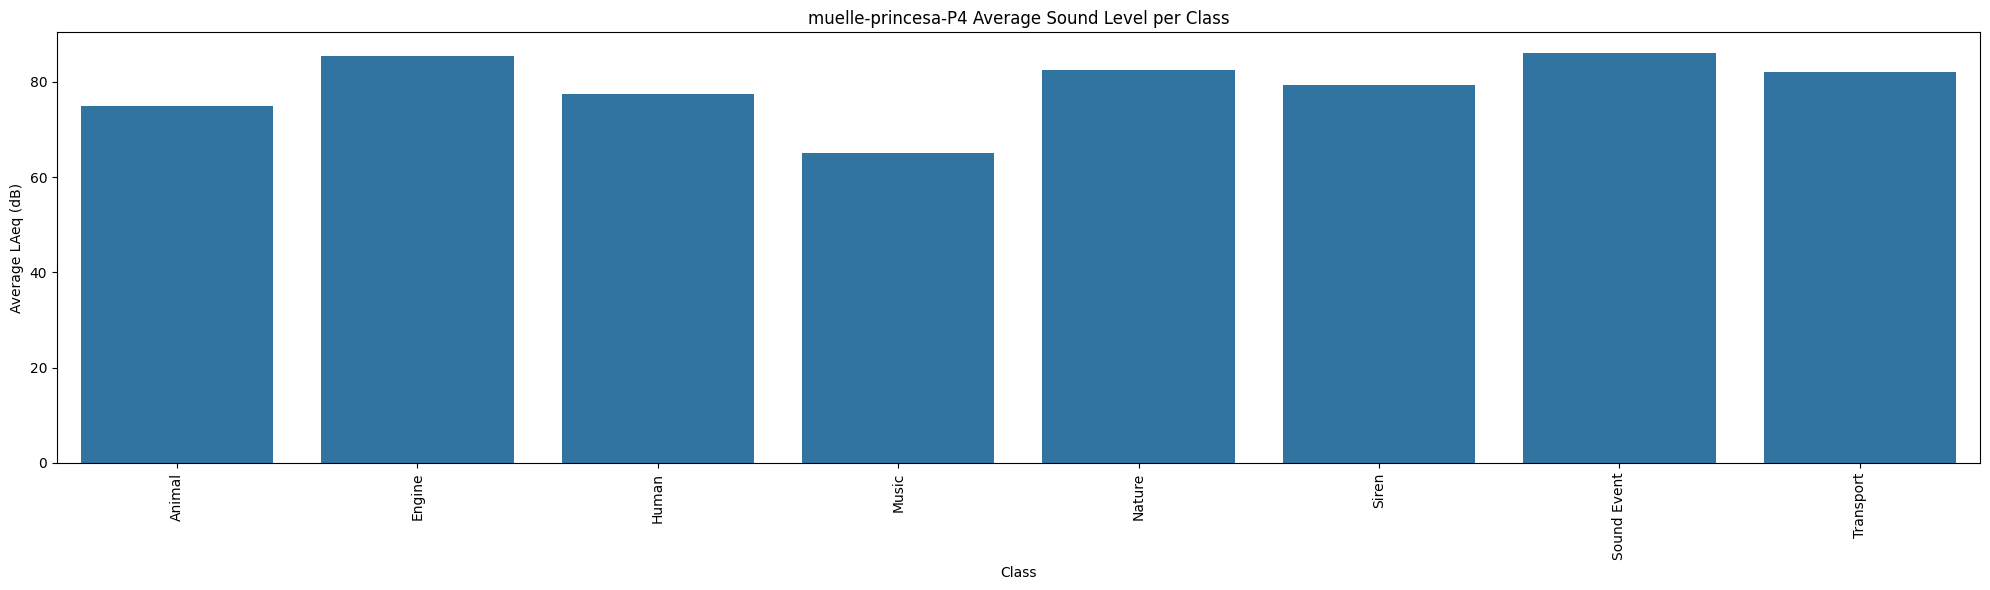

In [583]:
mean_levels = df_merged.groupby('NoisePort_Level_1')['LAeq'].apply(leq).reset_index()

plt.figure(figsize=(20, 6))

sns.barplot(data=mean_levels, x='NoisePort_Level_1', y='LAeq')
plt.xticks(rotation=90)

plt.title(f'{title} Average Sound Level per Class')
plt.xlabel('Class')
plt.ylabel('Average LAeq (dB)')
plt.tight_layout()
# plt.show()

# save the plot
plt.savefig(os.path.join(folder_output, f'{title}_average_sound_level.png'))
#save the csv file
mean_levels.to_csv(os.path.join(folder_output, f'{title}_average_sound_level.csv'))

# stacked area

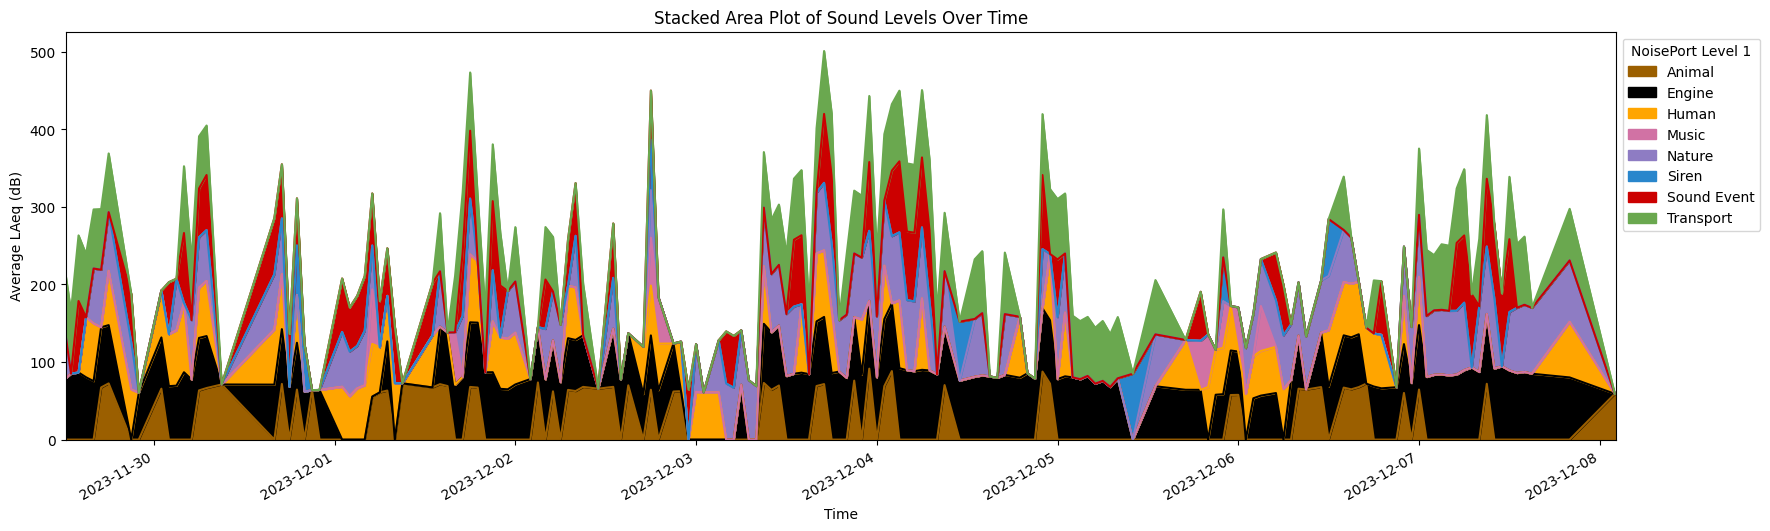

In [584]:
df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])
df_merged.set_index('start_time', inplace=True)

stack_data = df_merged.groupby([pd.Grouper(freq='h'), 'NoisePort_Level_1'])['LAeq'].apply(leq).unstack().fillna(0)

stack_data.plot(kind='area', stacked=True, figsize=(20, 6), color=COLOR_PALLET_PORT_L1)
plt.title('Stacked Area Plot of Sound Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Average LAeq (dB)')
plt.legend(title='NoisePort Level 1', bbox_to_anchor=(1, 1))
plt.xlim(df_merged.index.min(), df_merged.index.max())
plt.show()


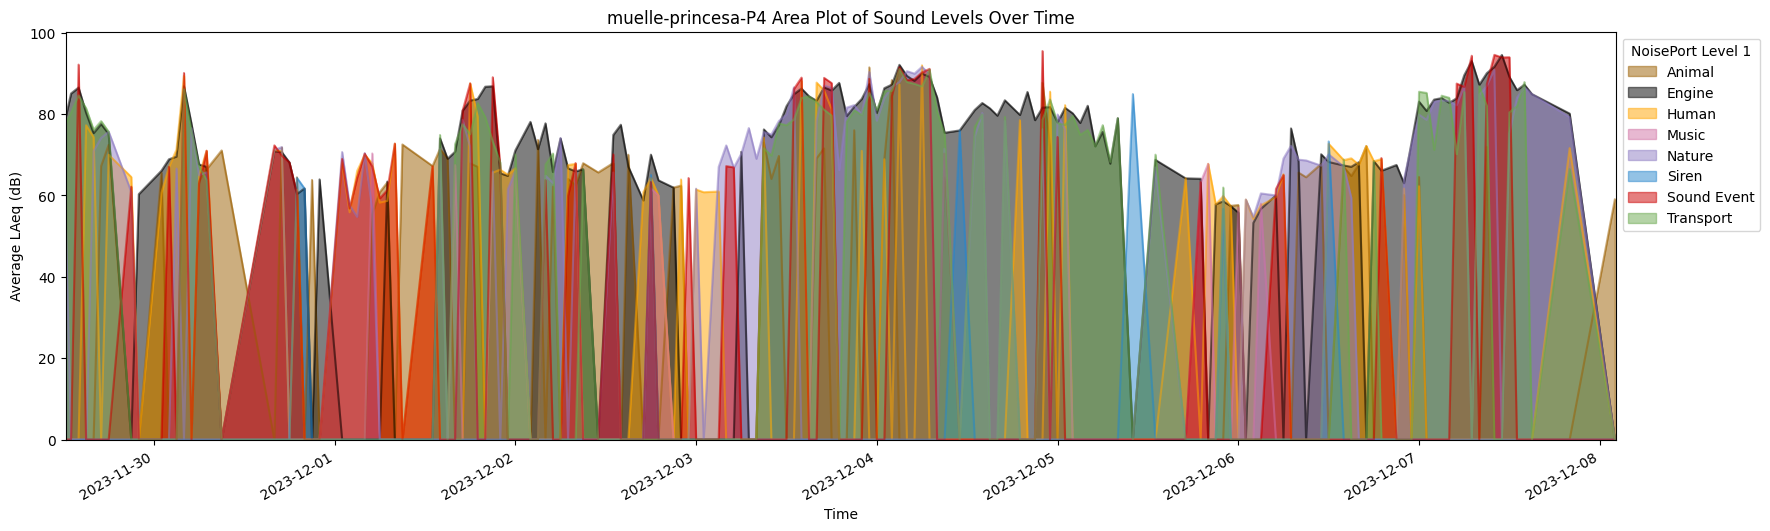

In [585]:
# df_merged['start_time'] = pd.to_datetime(df_merged['start_time'])
# df_merged.set_index('start_time', inplace=True)

stack_data = df_merged.groupby([pd.Grouper(freq='h'), 'NoisePort_Level_1'])['LAeq'].apply(leq).unstack()

stack_data.plot(kind='area', stacked=False, figsize=(20, 6), color=COLOR_PALLET_PORT_L1)
plt.title(f'{title} Area Plot of Sound Levels Over Time')
plt.xlabel('Time')
plt.ylabel('Average LAeq (dB)')
plt.legend(title='NoisePort Level 1', bbox_to_anchor=(1, 1))
# plt.legend(title='NoisePort Level 1')
plt.xlim(df_merged.index.min(), df_merged.index.max())
# plt.show()

#save plot
plt.savefig(os.path.join(folder_output, f'{title}_area_plot.png'))
# sve the csv file
stack_data.to_csv(os.path.join(folder_output, f'{title}_area_plot.csv'))

# Heatmap

C:\Users\scjaa\AppData\Local\Temp\ipykernel_17488\2203239936.py:5: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



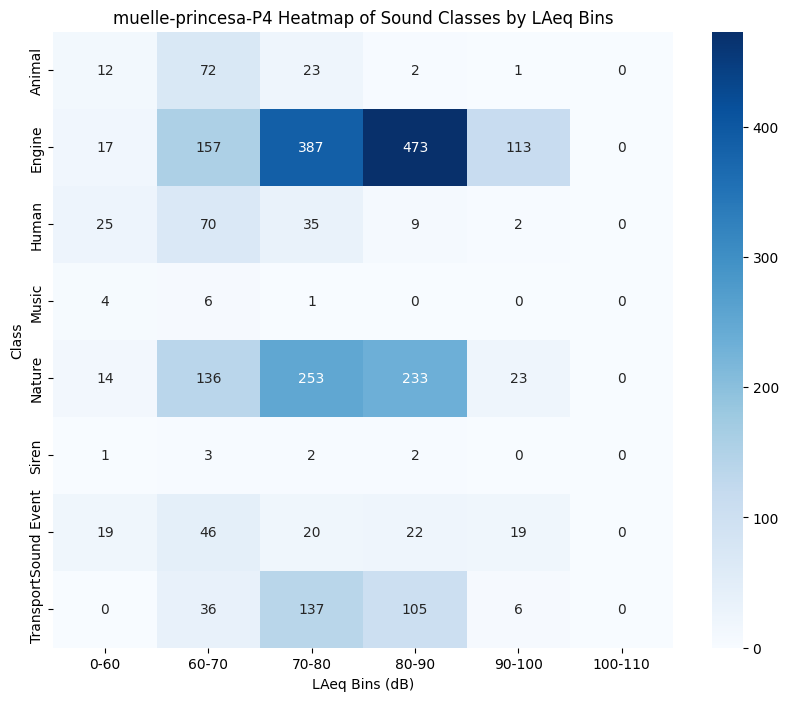

In [586]:
bins = [0, 60, 70, 80, 90, 100, 110]
labels = ['0-60', '60-70', '70-80', '80-90', '90-100', '100-110']
df_merged['LAeq_bins'] = pd.cut(df_merged['LAeq'], bins=bins, labels=labels, include_lowest=True)

heatmap_data = df_merged.pivot_table(index='NoisePort_Level_1', columns='LAeq_bins', values='LAeq', aggfunc='count').fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='Blues')
plt.title(f'{title} Heatmap of Sound Classes by LAeq Bins')
plt.xlabel('LAeq Bins (dB)')
plt.ylabel('Class')
# plt.show()

#sa plot
plt.savefig(os.path.join(folder_output, f'{title}_heatmap_sound_classes.png'))
#save the csv file
heatmap_data.to_csv(os.path.join(folder_output, f'{title}_heatmap_sound_classes.csv'))

# Bubble Chart

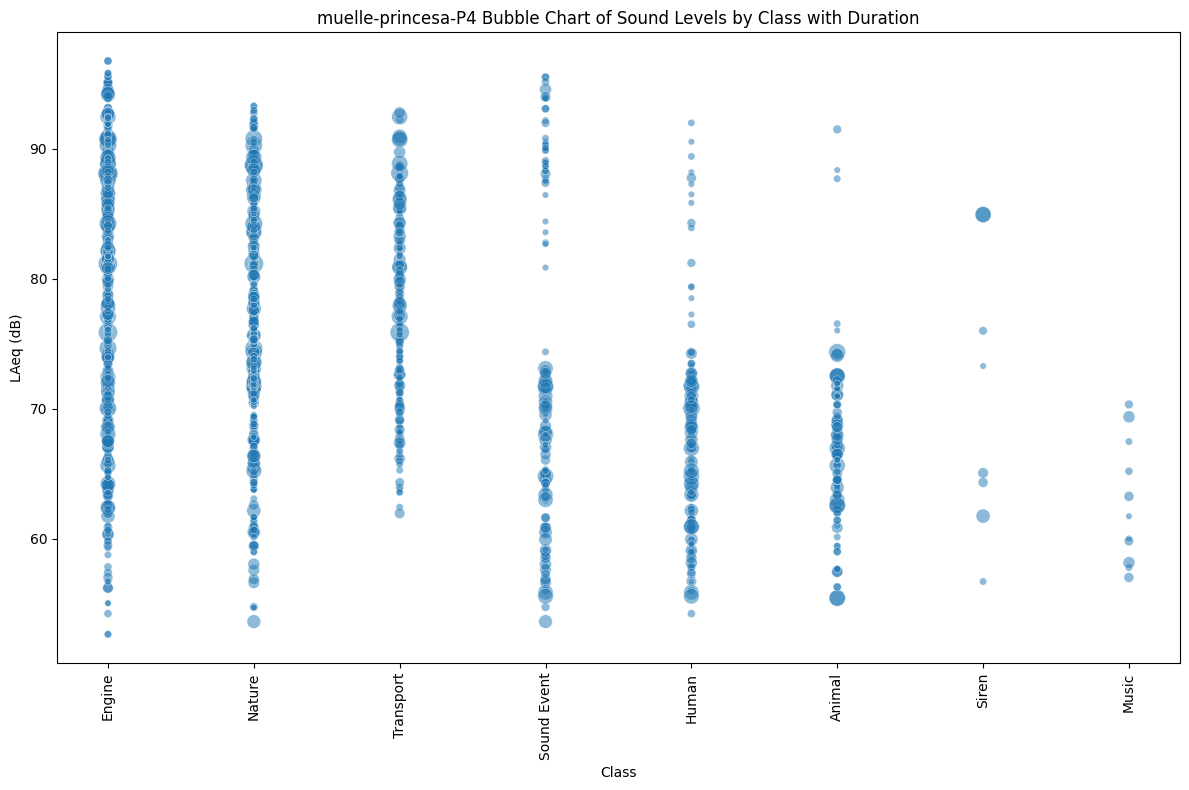

In [587]:
plt.figure(figsize=(12, 8))

sns.scatterplot(data=df_merged, x='NoisePort_Level_1', y='LAeq', size='duration', sizes=(20, 200), alpha=0.5, legend=None)
plt.xticks(rotation=90)

plt.title(f'{title} Bubble Chart of Sound Levels by Class with Duration')
plt.xlabel('Class')
plt.ylabel('LAeq (dB)')
plt.tight_layout()
# plt.show()

# save the plot
plt.savefig(os.path.join(folder_output, f'{title}_bubble_chart.png'))
#save the csv file
df_merged.to_csv(os.path.join(folder_output, f'{title}_bubble_chart.csv'))